In [1]:
from NLMNN import NLMNN
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from KNN_wrappers import LMNNClassifier, Chi2Classifier, NLMNNClassifier
import numpy as np
import glob
import scipy
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:

classes = {
    'back_pack':1,
    'bike':2,
    'calculator':3,
    'headphones':4,
    'keyboard':5,
    'laptop_computer':6,
    'monitor':7,
    'mouse':8,
    'mug':9,
    'projector':10,
}
X = []
targets=[]
for file in glob.glob('data/webcam/*/*/*.mat'):
    
    target = file.split('/')[3]
    if target in classes:
        targets.append(classes[target])
        X.append(scipy.io.loadmat(file)['histogram'])
X = np.asarray(X, dtype=np.float).squeeze()
y = np.asarray(targets)

n,d = X.shape

X = X/np.sum(X, axis=1, keepdims=True)


In [4]:

scores_c1 = cross_validate(LMNNClassifier(k=3, train=False, pca=10), X, y, cv=5, return_train_score=True, return_estimator=True )
scores_c2 = cross_validate(Chi2Classifier(k=3, r=10), X, y, cv=5, return_train_score=True, return_estimator=True )

steps=10
parameters = {'mu': np.logspace(-2,2, num=steps)}
model = LMNNClassifier(k=3, pca=10)
clf_lmnn = GridSearchCV(model, parameters, cv=5, verbose=3, n_jobs=10)
clf_lmnn.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   27.0s
[Parallel(n_jobs=10)]: Done  48 out of  50 | elapsed:   55.3s remaining:    2.3s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  1.1min finished
/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LMNNClassifier(k=3, mu=0.5, pca=10, train=True),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'mu': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [5]:
model = NLMNNClassifier(k=3, r=10, use_softmax=False)
clf = GridSearchCV(model, parameters, cv=5, verbose=3, n_jobs=10)
clf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done  48 out of  50 | elapsed:  5.3min remaining:   13.3s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:  5.6min finished
/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=NLMNNClassifier(A_init=None, k=3, l=0.01, lr=1, max_lr_reductions=20, mu=1,
        r=10, use_softmax=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'mu': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

loss = 145.98868065818237
number of imposters = 13740


<IPython.core.display.Javascript object>


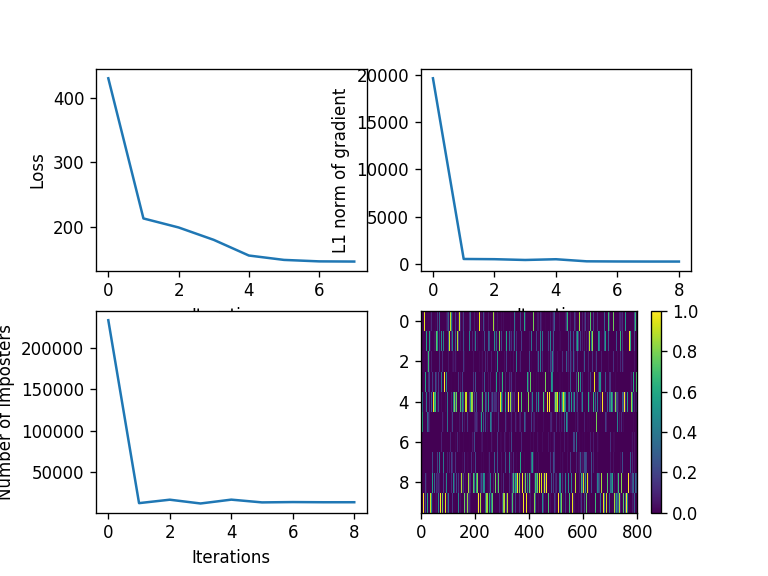

In [26]:
clf.best_estimator_.nlmnn.plot_debug()

<IPython.core.display.Javascript object>


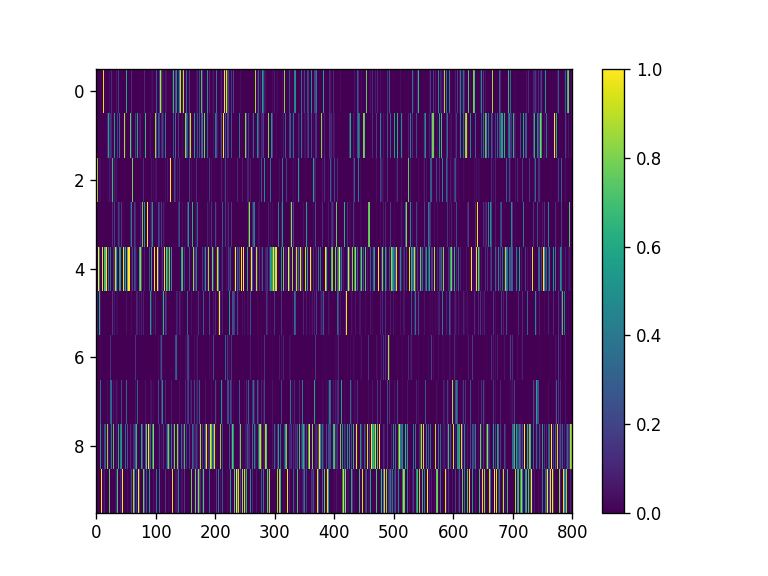

In [43]:
plt.figure()
plt.imshow(clf.best_estimator_.nlmnn.L.T, aspect='auto')
plt.colorbar()

In [8]:
print(f"normal           KNN train acc={np.mean(scores_c1['test_score']):.3f} +- {np.std(scores_c1['test_score'])/np.sqrt(5):.3f},  test acc={np.mean(scores_c1['test_score']):.3f} +- {np.std(scores_c1['test_score'])/np.sqrt(5):.3f}")
print(f"trained    LMNN  KNN train acc={clf_lmnn.cv_results_['mean_train_score'][clf_lmnn.best_index_]:.3f} +- {clf_lmnn.cv_results_['std_train_score'][clf_lmnn.best_index_]/np.sqrt(5):.3f},  test acc={clf_lmnn.cv_results_['mean_test_score'][clf_lmnn.best_index_]:.3f} +- {clf_lmnn.cv_results_['std_test_score'][clf_lmnn.best_index_]/np.sqrt(5):.3f}")
print(f"untrained NLMNN  KNN train acc={np.mean(scores_c2['train_score']):.3f} +- {np.std(scores_c2['train_score'])/np.sqrt(5):.3f},  test acc={np.mean(scores_c2['test_score']):.3f} +- {np.std(scores_c2['test_score'])/np.sqrt(5):.3f}")
print(f"trained   NLMNN  KNN train acc={clf.cv_results_['mean_train_score'][clf.best_index_]:.3f} +- {clf.cv_results_['std_train_score'][clf.best_index_]/np.sqrt(5):.3f},  test acc={clf.cv_results_['mean_test_score'][clf.best_index_]:.3f} +- {clf.cv_results_['std_test_score'][clf.best_index_]/np.sqrt(5):.3f}")


normal           KNN train acc=0.780 +- 0.013,  test acc=0.780 +- 0.013
trained    LMNN  KNN train acc=0.919 +- 0.005,  test acc=0.786 +- 0.022
untrained NLMNN  KNN train acc=0.654 +- 0.006,  test acc=0.410 +- 0.018
trained   NLMNN  KNN train acc=0.942 +- 0.004,  test acc=0.824 +- 0.013


In [10]:
parameters={'l':np.logspace(-2,1,num=10)}
model = NLMNNClassifier(k=3, r=10, use_softmax=False,mu=clf.best_params_['mu'])
clf_l = GridSearchCV(model, parameters, cv=5, verbose=3, n_jobs=10)
clf_l.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done  48 out of  50 | elapsed: 13.1min remaining:   32.8s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed: 14.8min finished
/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=NLMNNClassifier(A_init=None, k=3, l=0.01, lr=1, max_lr_reductions=20, mu=1,
        r=10, use_softmax=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'l': array([ 0.01   ,  0.02154,  0.04642,  0.1    ,  0.21544,  0.46416,
        1.     ,  2.15443,  4.64159, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
print(f"trained   NLMNN  KNN train acc={clf_l.cv_results_['mean_train_score'][clf_l.best_index_]:.3f} +- {clf_l.cv_results_['std_train_score'][clf_l.best_index_]/np.sqrt(5):.3f},  test acc={clf_l.cv_results_['mean_test_score'][clf_l.best_index_]:.3f} +- {clf_l.cv_results_['std_test_score'][clf_l.best_index_]/np.sqrt(5):.3f}")


trained   NLMNN  KNN train acc=0.952 +- 0.008,  test acc=0.837 +- 0.008


/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/zhome/9e/8/130993/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


<IPython.core.display.Javascript object>


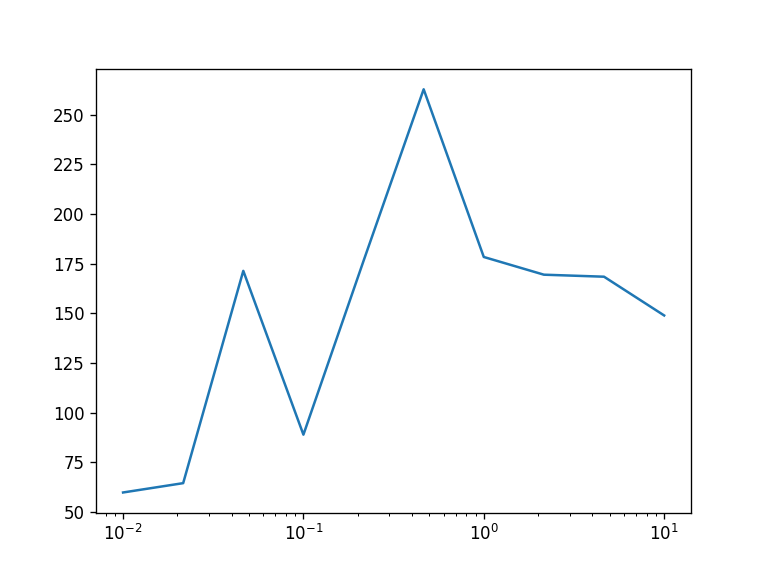

In [19]:
plt.figure()
plt.plot(clf_l.cv_results_['param_l'].data,clf_l.cv_results_['mean_fit_time'])
plt.xscale('log')


<IPython.core.display.Javascript object>


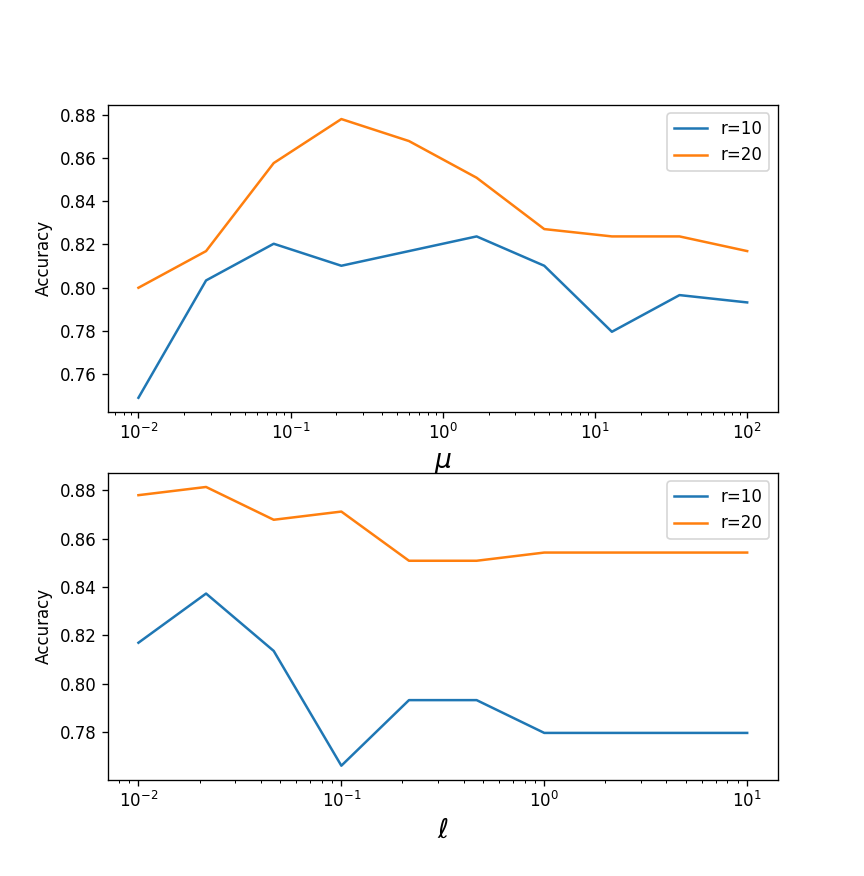

In [40]:

plt.figure()
plt.subplot(211)
plt.plot(clf.cv_results_['param_mu'].data,clf.cv_results_['mean_test_score'], label='r=10')
#These numbers are taken from the webcam_20 notebook
plt.plot(clf.cv_results_['param_mu'].data,[0.8       , 0.81694915, 0.85762712, 0.8779661 , 0.86779661,
       0.85084746, 0.82711864, 0.82372881, 0.82372881, 0.81694915], label='r=20')

plt.xscale('log')
plt.ylabel('Accuracy')
label=plt.xlabel('$\mu$')
label.set_fontsize(16)
plt.legend()

plt.subplot(212)
plt.plot(clf_l.cv_results_['param_l'].data,clf_l.cv_results_['mean_test_score'],label='r=10')
#These numbers are taken from the webcam_20 notebook
plt.plot(clf_l.cv_results_['param_l'].data,[0.8779661 , 0.88135593, 0.86779661, 0.87118644, 0.85084746,
       0.85084746, 0.85423729, 0.85423729, 0.85423729, 0.85423729], label='r=20')

plt.xscale('log')
label=plt.xlabel('$\ell$')
label.set_fontsize(16)
plt.ylabel('Accuracy')
plt.legend()

In [20]:
n = NLMNN(k=3, r=10, lr=10000)
n.fit(X,y, verbose=True)


Gradient
[[-1.86527162e-03  2.31265963e-08  1.15990176e-08 ...  5.24356452e-09
  -2.65583480e-08 -2.53320350e-09]
 [-2.31376773e-09 -2.03995105e-04 -2.04762518e-09 ... -3.60256825e-09
   1.86062020e-08 -1.30454818e-09]
 [ 2.49970645e-09  1.36768961e-08 -6.95033347e-04 ...  8.64836710e-11
   4.24296207e-08  4.71965806e-08]
 ...
 [-9.93494053e-05 -6.55394439e-05  1.02724012e-05 ... -4.42632216e-05
  -1.64583016e-04 -1.31366988e-04]
 [ 6.46831565e-06  4.33683444e-05  2.13598182e-05 ...  4.48899173e-05
  -9.86922163e-05 -1.21884046e-04]
 [-6.87730573e-05 -1.12500187e-04 -9.32186973e-05 ... -8.59659939e-05
   1.33979460e-04  1.89534354e-04]]
Gradient size = 0.5684520863244962
imposters=233558
updated L
[[1.00000000e+00 3.59900976e-13 3.59942466e-13 ... 3.59965343e-13
  3.60079837e-13 3.59993337e-13]
 [5.90340625e-06 9.99946871e-01 5.90339053e-06 ... 5.90348233e-06
  5.90217138e-06 5.90334667e-06]
 [4.35063533e-08 4.35014908e-08 9.99999608e-01 ... 4.35074032e-08
  4.34889847e-08 4.34869117e

updated L
[[1.00000000e+00 3.54520032e-13 3.54560901e-13 ... 3.54583436e-13
  3.54696218e-13 3.54611012e-13]
 [5.32442944e-06 9.99952082e-01 5.32441526e-06 ... 5.32450108e-06
  5.32331569e-06 5.32437571e-06]
 [4.27397921e-08 4.27350148e-08 9.99999615e-01 ... 4.27408236e-08
  4.27227296e-08 4.27206930e-08]
 ...
 [1.43225720e-01 1.07092959e-01 4.82845480e-02 ... 8.44348369e-02
  2.71709822e-01 1.96301949e-01]
 [7.53971719e-02 5.18315890e-02 6.49487143e-02 ... 5.07877198e-02
  2.16690032e-01 2.73699420e-01]
 [1.28065309e-01 2.27421886e-01 1.63038020e-01 ... 1.60753411e-01
  1.71027608e-02 9.82191518e-03]]
updated loss = 308.42273234695256

Gradient
[[-2.23143876e-07  9.03999762e-19 -8.88738395e-20 ... -5.85394451e-20
  -7.91206842e-20 -7.91366069e-20]
 [ 1.80107997e-12 -1.52018665e-06  1.82898379e-12 ... -6.06960615e-12
   1.80064451e-12  1.80086282e-12]
 [-8.88136338e-15  1.41084633e-13 -2.57630048e-07 ... -2.15685323e-14
  -8.87341204e-15 -8.87915000e-15]
 ...
 [ 1.85249881e-07 -4.94790


Gradient
[[-1.97487823e-07  7.80446723e-19 -7.83581572e-20 ... -6.09518295e-20
  -6.90424083e-20 -6.90562949e-20]
 [ 1.44547164e-12 -1.33930225e-06  1.47327837e-12 ... -4.97074953e-12
   1.44512382e-12  1.44529711e-12]
 [-8.13080844e-15  1.25431915e-13 -2.42276990e-07 ... -2.10374399e-14
  -8.12365664e-15 -8.12868617e-15]
 ...
 [ 1.42960472e-07 -4.05726961e-07  4.67496504e-08 ... -7.68087497e-08
   2.68562162e-07  1.95117184e-07]
 [-2.52659837e-08  4.20782389e-08 -2.25477595e-08 ...  1.07257795e-07
  -7.28755834e-08 -9.21633381e-08]
 [ 1.89470477e-07 -1.76357003e-06  2.19517086e-07 ... -4.56014297e-07
   2.56123234e-08  1.47200336e-08]]
Gradient size = 0.0005772871421890991
imposters=27353
updated L
[[1.00000000e+00 3.48767007e-13 3.48807213e-13 ... 3.48829382e-13
  3.48940334e-13 3.48856511e-13]
 [4.76399144e-06 9.99957126e-01 4.76397874e-06 ... 4.76405816e-06
  4.76299492e-06 4.76394336e-06]
 [4.19206540e-08 4.19159678e-08 9.99999623e-01 ... 4.19216657e-08
  4.19039184e-08 4.1901920

updated L
[[1.00000000e+00 3.44150719e-13 3.44190394e-13 ... 3.44212270e-13
  3.44321753e-13 3.44239039e-13]
 [4.36343853e-06 9.99960730e-01 4.36342689e-06 ... 4.36350139e-06
  4.36252579e-06 4.36339449e-06]
 [4.12679869e-08 4.12633734e-08 9.99999629e-01 ... 4.12689830e-08
  4.12515120e-08 4.12495456e-08]
 ...
 [1.41903445e-01 1.15107107e-01 4.85333323e-02 ... 8.65013107e-02
  2.64174246e-01 1.92974151e-01]
 [7.51753064e-02 5.11621925e-02 6.47307782e-02 ... 4.96452796e-02
  2.17605071e-01 2.75653436e-01]
 [1.16600648e-01 2.76822021e-01 1.47775208e-01 ... 1.61121215e-01
  1.59566966e-02 9.17861957e-03]]
updated loss = 294.0618890513372

Gradient
[[-1.75449496e-07  6.65280225e-19 -6.91372728e-20 ... -5.74251475e-20
  -6.03904482e-20 -6.04017777e-20]
 [ 1.14493236e-12 -1.16922369e-06  1.17065725e-12 ... -3.97255195e-12
   1.14465865e-12  1.14479329e-12]
 [-6.62992788e-15  1.08504635e-13 -2.07852049e-07 ... -2.23595567e-14
  -6.62383343e-15 -6.62836692e-15]
 ...
 [ 1.05317960e-07 -3.068883


Gradient
[[-1.56224647e-07  5.68557147e-19 -6.13573119e-20 ... -3.29255710e-20
  -5.31056342e-20 -5.31149479e-20]
 [ 9.36945408e-13 -9.78675152e-07  9.60003768e-13 ... -3.46237149e-12
   9.36731595e-13  9.36825721e-13]
 [-5.28537397e-15  9.56616814e-14 -1.76555163e-07 ... -2.41273645e-14
  -5.28014419e-15 -5.28437471e-15]
 ...
 [ 8.44006371e-08 -2.51529454e-07  2.74022364e-08 ... -2.37282546e-08
   1.56168107e-07  1.14466188e-07]
 [-1.79657760e-08  2.92512147e-08 -1.62051197e-08 ...  7.91260444e-08
  -5.21497456e-08 -6.61228893e-08]
 [ 1.23752877e-07 -1.57994282e-06  1.39042758e-07 ... -2.85232951e-07
   1.70869471e-08  9.83443693e-09]]
Gradient size = 0.00044383073692115483
imposters=26042
updated L
[[1.00000000e+00 3.39188590e-13 3.39227692e-13 ... 3.39249253e-13
  3.39357158e-13 3.39275636e-13]
 [3.97084232e-06 9.99964264e-01 3.97083172e-06 ... 3.97090118e-06
  3.97001171e-06 3.97080225e-06]
 [4.05839857e-08 4.05794482e-08 9.99999635e-01 ... 4.05849653e-08
  4.05677838e-08 4.056585

updated L
[[1.00000000e+00 3.35079952e-13 3.35118581e-13 ... 3.35139880e-13
  3.35246478e-13 3.35165944e-13]
 [3.69896029e-06 9.99966710e-01 3.69895041e-06 ... 3.69901632e-06
  3.69818655e-06 3.69892296e-06]
 [4.00716378e-08 4.00671573e-08 9.99999639e-01 ... 4.00726050e-08
  4.00556404e-08 4.00537310e-08]
 ...
 [1.40938929e-01 1.20936451e-01 4.86612460e-02 ... 8.74207666e-02
  2.59271251e-01 1.90708618e-01]
 [7.49887694e-02 5.06332776e-02 6.45511058e-02 ... 4.87153257e-02
  2.18315065e-01 2.77202588e-01]
 [1.05285982e-01 3.33095587e-01 1.33092424e-01 ... 1.55722795e-01
  1.46693720e-02 8.44842573e-03]]
updated loss = 280.28052159254787

Gradient
[[-1.43744406e-07  4.80648094e-19 -5.60147435e-20 ... -4.50238711e-21
  -4.81750503e-20 -4.81814107e-20]
 [ 7.43832882e-13 -7.95252421e-07  7.63243312e-13 ... -2.92448410e-12
   7.43670840e-13  7.43733466e-13]
 [-4.11040991e-15  8.17293244e-14 -1.48010302e-07 ... -2.31628901e-14
  -4.10604755e-15 -4.10983461e-15]
 ...
 [ 6.16956008e-08 -2.01776


Gradient
[[-1.37903030e-07  4.30242937e-19 -5.32774251e-20 ...  6.21974666e-21
  -4.56629695e-20 -4.56674411e-20]
 [ 6.20419108e-13 -7.03052841e-07  6.38921849e-13 ... -2.52986695e-12
   6.20285897e-13  6.20335559e-13]
 [-3.79181104e-15  7.46012698e-14 -1.39544282e-07 ... -2.07406670e-14
  -3.78780807e-15 -3.79127006e-15]
 ...
 [ 4.52852309e-08 -1.63407511e-07  1.43757466e-08 ...  2.30467955e-08
   8.29803452e-08  6.11666909e-08]
 [-1.30459656e-08  2.29515968e-08 -1.19838756e-08 ...  5.90680877e-08
  -3.80722697e-08 -4.83805559e-08]
 [ 8.14309090e-08 -1.47355982e-06  8.85393661e-08 ... -1.46264501e-07
   1.14199077e-08  6.57994572e-09]]
Gradient size = 0.00034965316880167013
imposters=24659
updated L
[[1.00000000e+00 3.30381497e-13 3.30419584e-13 ... 3.30440584e-13
  3.30545688e-13 3.30466283e-13]
 [3.43061465e-06 9.99969125e-01 3.43060548e-06 ... 3.43066779e-06
  3.42989705e-06 3.43058003e-06]
 [3.95059295e-08 3.95015119e-08 9.99999644e-01 ... 3.95068832e-08
  3.94901580e-08 3.948827

updated L
[[1.00000000e+00 3.26384014e-13 3.26421640e-13 ... 3.26442387e-13
  3.26546218e-13 3.26467774e-13]
 [3.23023661e-06 9.99970929e-01 3.23022798e-06 ... 3.23028751e-06
  3.22956092e-06 3.23020401e-06]
 [3.90244158e-08 3.90200518e-08 9.99999649e-01 ... 3.90253579e-08
  3.90088365e-08 3.90069770e-08]
 ...
 [1.40269449e-01 1.25329421e-01 4.87233298e-02 ... 8.74172914e-02
  2.56144449e-01 1.89214318e-01]
 [7.48242234e-02 5.01736646e-02 6.43957836e-02 ... 4.79324580e-02
  2.18901889e-01 2.78506970e-01]
 [9.35709753e-02 3.98582270e-01 1.18122907e-01 ... 1.44465004e-01
  1.32119879e-02 7.61609296e-03]]
updated loss = 267.5700842805486

Gradient
[[-1.28707677e-07  3.63274226e-19 -4.91335146e-20 ...  2.92720261e-20
  -4.20181973e-20 -4.20203953e-20]
 [ 5.19422579e-13 -6.31738205e-07  5.35218015e-13 ... -2.10906170e-12
   5.19311474e-13  5.19352364e-13]
 [-3.29071985e-15  6.55791831e-14 -1.26565088e-07 ... -1.96977168e-14
  -3.28720388e-15 -3.29027658e-15]
 ...
 [ 3.25002170e-08 -1.278088


Gradient
[[-1.14108129e-07  3.13920666e-19 -4.35972124e-20 ...  2.36751452e-20
  -3.68194245e-20 -3.68213415e-20]
 [ 4.33184401e-13 -5.53225139e-07  4.47505827e-13 ... -1.78714828e-12
   4.33093133e-13  4.33125151e-13]
 [-2.97488463e-15  5.92372449e-14 -1.17086952e-07 ... -1.89120243e-14
  -2.97169243e-15 -2.97448827e-15]
 ...
 [ 2.45408019e-08 -1.05680242e-07  7.40913944e-09 ...  3.96550894e-08
   4.47082960e-08  3.30661613e-08]
 [-9.73641984e-09  1.66921366e-08 -9.06728989e-09 ...  4.40065446e-08
  -2.85422473e-08 -3.63377886e-08]
 [ 5.44516555e-08 -1.42453889e-06  5.75378888e-08 ... -6.99786277e-08
   7.72655107e-09  4.45566230e-09]]
Gradient size = 0.0002861517280769565
imposters=23505
updated L
[[1.00000000e+00 3.21977044e-13 3.22014162e-13 ... 3.22034628e-13
  3.22137058e-13 3.22059673e-13]
 [3.01985642e-06 9.99972822e-01 3.01984834e-06 ... 3.01990484e-06
  3.01922474e-06 3.01982595e-06]
 [3.84903157e-08 3.84860111e-08 9.99999654e-01 ... 3.84912450e-08
  3.84749496e-08 3.8473115

updated L
[[1.00000000e+00 3.18192753e-13 3.18229435e-13 ... 3.18249660e-13
  3.18350886e-13 3.18274411e-13]
 [2.86901835e-06 9.99974180e-01 2.86901067e-06 ... 2.86906494e-06
  2.86841822e-06 2.86898940e-06]
 [3.80204342e-08 3.80161819e-08 9.99999658e-01 ... 3.80213522e-08
  3.80052557e-08 3.80034440e-08]
 ...
 [1.39822325e-01 1.28609593e-01 4.87557067e-02 ... 8.69021464e-02
  2.54168633e-01 1.88248727e-01]
 [7.46809751e-02 4.97821208e-02 6.42628881e-02 ... 4.72813079e-02
  2.19393126e-01 2.79613441e-01]
 [8.09153808e-02 4.74566703e-01 1.02077689e-01 ... 1.28408882e-01
  1.15418885e-02 6.65809757e-03]]
updated loss = 255.95141652390816

Gradient
[[-1.06826785e-07  2.78791255e-19 -4.04313517e-20 ...  2.64900281e-20
  -3.40000028e-20 -3.40012048e-20]
 [ 3.36925336e-13 -4.42918950e-07  3.50451349e-13 ... -1.44176903e-12
   3.36856816e-13  3.36877994e-13]
 [-2.91372132e-15  5.39576391e-14 -1.15041155e-07 ... -1.64675368e-14
  -2.91074842e-15 -2.91323203e-15]
 ...
 [ 1.99001246e-08 -9.15675


Gradient
[[-1.04556156e-07  2.46105947e-19 -3.90845009e-20 ...  4.66488606e-20
  -3.28845565e-20 -3.28841888e-20]
 [ 2.75485950e-13 -3.38922389e-07  2.87884757e-13 ... -1.26562630e-12
   2.75434903e-13  2.75444318e-13]
 [-2.75714089e-15  4.96569989e-14 -1.11163886e-07 ... -1.47974058e-14
  -2.75438104e-15 -2.75664580e-15]
 ...
 [ 1.64566617e-08 -8.24626802e-08  4.75495429e-09 ...  3.79365372e-08
   2.98641087e-08  2.21371723e-08]
 [-7.50125960e-09  1.33437172e-08 -7.11517093e-09 ...  3.32421329e-08
  -2.20755192e-08 -2.81506622e-08]
 [ 3.55078543e-08 -1.34457608e-06  3.61433860e-08 ... -2.56254834e-08
   5.08336179e-09  2.93331655e-09]]
Gradient size = 0.0002374834858202714
imposters=22509
updated L
[[1.00000000e+00 3.13800860e-13 3.13837036e-13 ... 3.13856982e-13
  3.13956810e-13 3.13881391e-13]
 [2.72875362e-06 9.99975442e-01 2.72874631e-06 ... 2.72879852e-06
  2.72818282e-06 2.72872608e-06]
 [3.74672732e-08 3.74630826e-08 9.99999663e-01 ... 3.74681779e-08
  3.74523156e-08 3.7450530

updated L
[[1.00000000e+00 3.10039840e-13 3.10075582e-13 ... 3.10095290e-13
  3.10193922e-13 3.10119406e-13]
 [2.64686585e-06 9.99976179e-01 2.64685875e-06 ... 2.64690985e-06
  2.64631218e-06 2.64683914e-06]
 [3.69791382e-08 3.69750019e-08 9.99999667e-01 ... 3.69800311e-08
  3.69643754e-08 3.69626133e-08]
 ...
 [1.39452473e-01 1.31487712e-01 4.87700336e-02 ... 8.62391675e-02
  2.52641739e-01 1.87482369e-01]
 [7.45553646e-02 4.94443489e-02 6.41487049e-02 ... 4.67312675e-02
  2.19808735e-01 2.80560977e-01]
 [6.75846816e-02 5.58161304e-01 8.52460365e-02 ... 1.08944591e-01
  9.71391061e-03 5.60661237e-03]]
updated loss = 247.10614117219555

Gradient
[[-9.51745126e-08  2.18436188e-19 -3.55490719e-20 ...  4.44531183e-20
  -2.95161545e-20 -2.95158086e-20]
 [ 2.11972283e-13 -2.18876544e-07  2.23510815e-13 ... -1.09390845e-12
   2.11939384e-13  2.11936569e-13]
 [-2.71005300e-15  4.57964977e-14 -1.09370303e-07 ... -1.34496919e-14
  -2.70745135e-15 -2.70948958e-15]
 ...
 [ 1.41100213e-08 -7.57361


Gradient
[[-9.37651738e-08  2.08810056e-19 -3.46342959e-20 ...  4.16779411e-20
  -2.87363363e-20 -2.87357056e-20]
 [ 1.81612866e-13 -1.81808345e-07  1.91494479e-13 ... -9.44588156e-13
   1.81586269e-13  1.81581207e-13]
 [-2.63016905e-15  4.24357441e-14 -1.07088553e-07 ... -1.19079690e-14
  -2.62771880e-15 -2.62957397e-15]
 ...
 [ 1.33900093e-08 -7.66375208e-08  3.81340755e-09 ...  3.09174420e-08
   2.42233696e-08  1.79884426e-08]
 [-5.46774607e-09  8.73458333e-09 -5.32720642e-09 ...  2.42496473e-08
  -1.61440481e-08 -2.06147497e-08]
 [ 2.38562724e-08 -1.30162805e-06  2.34709198e-08 ... -1.10765705e-08
   3.43825911e-09  1.98498050e-09]]
Gradient size = 0.00020358775273306043
imposters=21804
updated L
[[1.00000000e+00 3.05760085e-13 3.05795334e-13 ... 3.05814769e-13
  3.05912040e-13 3.05838553e-13]
 [2.56795648e-06 9.99976889e-01 2.56794959e-06 ... 2.56799963e-06
  2.56741932e-06 2.56793056e-06]
 [3.63982944e-08 3.63942229e-08 9.99999672e-01 ... 3.63991734e-08
  3.63837635e-08 3.638202

updated L
[[1.00000000e+00 3.02019652e-13 3.02054470e-13 ... 3.02073667e-13
  3.02169748e-13 3.02097160e-13]
 [2.51596726e-06 9.99977357e-01 2.51596051e-06 ... 2.51600989e-06
  2.51544098e-06 2.51594187e-06]
 [3.58857397e-08 3.58817253e-08 9.99999677e-01 ... 3.58866063e-08
  3.58714134e-08 3.58697035e-08]
 ...
 [1.39074968e-01 1.34427217e-01 4.87661652e-02 ... 8.55551529e-02
  2.51210875e-01 1.86739364e-01]
 [7.44499234e-02 4.91821210e-02 6.40556063e-02 ... 4.62728313e-02
  2.20152303e-01 2.81349995e-01]
 [5.37916921e-02 6.46685648e-01 6.78565282e-02 ... 8.75394277e-02
  7.77608249e-03 4.48998793e-03]]
updated loss = 239.9160844779508

Gradient
[[-8.67655500e-08  1.93285994e-19 -3.17924766e-20 ...  3.36169201e-20
  -2.62122118e-20 -2.62119228e-20]
 [ 1.48553983e-13 -1.29405361e-07  1.57474978e-13 ... -8.24415751e-13
   1.48535126e-13  1.48526407e-13]
 [-2.51720266e-15  3.91783680e-14 -1.03369516e-07 ... -1.10918117e-14
  -2.51491164e-15 -2.51659451e-15]
 ...
 [ 1.17164983e-08 -7.335594


Gradient
[[-8.54961908e-08  1.83533426e-19 -3.09394187e-20 ...  3.46152247e-20
  -2.55051754e-20 -2.55045268e-20]
 [ 1.15262984e-13 -6.73804278e-08  1.24379022e-13 ... -7.32261922e-13
   1.15252872e-13  1.15239091e-13]
 [-2.59310510e-15  3.77551224e-14 -1.05390254e-07 ... -1.00369288e-14
  -2.59084970e-15 -2.59240722e-15]
 ...
 [ 1.11366232e-08 -7.18497619e-08  3.10545162e-09 ...  2.71507579e-08
   2.00884920e-08  1.49429367e-08]
 [-3.70585354e-09  4.41576006e-09 -3.77104933e-09 ...  1.89547569e-08
  -1.09719344e-08 -1.40257242e-08]
 [ 1.48885499e-08 -1.26142000e-06  1.39863819e-08 ...  1.29801399e-09
   2.15647339e-09  1.24544942e-09]]
Gradient size = 0.00017960555951409543
imposters=21261
updated L
[[1.00000000e+00 2.97603692e-13 2.97638000e-13 ... 2.97656917e-13
  2.97751593e-13 2.97680066e-13]
 [2.47176890e-06 9.99977755e-01 2.47176226e-06 ... 2.47181116e-06
  2.47125186e-06 2.47174395e-06]
 [3.52604155e-08 3.52564707e-08 9.99999683e-01 ... 3.52612671e-08
  3.52463388e-08 3.524465

updated L
[[1.00000000e+00 2.93679062e-13 2.93712918e-13 ... 2.93731586e-13
  2.93825013e-13 2.93754429e-13]
 [2.45684624e-06 9.99977889e-01 2.45683964e-06 ... 2.45688854e-06
  2.45633232e-06 2.45682145e-06]
 [3.46881161e-08 3.46842352e-08 9.99999688e-01 ... 3.46889539e-08
  3.46742679e-08 3.46726150e-08]
 ...
 [1.38657262e-01 1.37636524e-01 4.87444359e-02 ... 8.48439872e-02
  2.49742745e-01 1.85952755e-01]
 [7.43636288e-02 4.89954910e-02 6.39824707e-02 ... 4.58797307e-02
  2.20418688e-01 2.81971012e-01]
 [4.03450817e-02 7.34254996e-01 5.09081817e-02 ... 6.59445338e-02
  5.85640542e-03 3.38254710e-03]]
updated loss = 233.57874874989247

Gradient
[[-8.70115780e-08  1.76763173e-19 -3.06388778e-20 ...  3.62591653e-20
  -2.55611251e-20 -2.55599630e-20]
 [ 8.32126895e-14 -1.89674370e-08  9.27742057e-14 ... -6.28865820e-13
   8.32098525e-14  8.31931032e-14]
 [-2.65342954e-15  3.61177745e-14 -1.07631765e-07 ... -8.87417363e-15
  -2.65122663e-15 -2.65264516e-15]
 ...
 [ 1.09565865e-08 -7.42883


Gradient
[[-8.77719605e-08  1.72692092e-19 -3.02261787e-20 ...  3.53478142e-20
  -2.54193986e-20 -2.54179878e-20]
 [ 7.43505813e-14 -5.24918694e-09  8.32612408e-14 ... -5.87196504e-13
   7.43495478e-14  7.43321991e-14]
 [-2.59081413e-15  3.43430927e-14 -1.06205724e-07 ... -8.27610313e-15
  -2.58870031e-15 -2.59002277e-15]
 ...
 [ 1.07384873e-08 -7.70576289e-08  3.02162800e-09 ...  2.42520088e-08
   1.93125136e-08  1.43907452e-08]
 [-2.76030269e-09  1.88034737e-09 -2.90201172e-09 ...  1.58975127e-08
  -8.19032247e-09 -1.04790150e-08]
 [ 9.22738399e-09 -1.26887642e-06  8.39914374e-09 ...  3.96942873e-09
   1.34121686e-09  7.74815389e-10]]
Gradient size = 0.00016287579104159447
imposters=20803
updated L
[[1.00000000e+00 2.88804659e-13 2.88837953e-13 ... 2.88856311e-13
  2.88948187e-13 2.88878775e-13]
 [2.44957770e-06 9.99977955e-01 2.44957111e-06 ... 2.44962019e-06
  2.44906530e-06 2.44955298e-06]
 [3.39852233e-08 3.39814208e-08 9.99999694e-01 ... 3.39860441e-08
  3.39716557e-08 3.397003

updated L
[[1.00000000e+00 2.84478098e-13 2.84510893e-13 ... 2.84528975e-13
  2.84619475e-13 2.84551103e-13]
 [2.45486748e-06 9.99977907e-01 2.45486088e-06 ... 2.45491033e-06
  2.45435398e-06 2.45484271e-06]
 [3.33554217e-08 3.33516895e-08 9.99999700e-01 ... 3.33562274e-08
  3.33421056e-08 3.33405162e-08]
 ...
 [1.38133758e-01 1.41513194e-01 4.86972472e-02 ... 8.41194841e-02
  2.48023745e-01 1.85004319e-01]
 [7.42904520e-02 4.88672957e-02 6.39230330e-02 ... 4.55250277e-02
  2.20631272e-01 2.82474832e-01]
 [2.80683503e-02 8.14803250e-01 3.54276433e-02 ... 4.59673073e-02
  4.08617026e-03 2.36058471e-03]]
updated loss = 227.9305771452214

Gradient
[[-8.51655968e-08  1.63020978e-19 -2.88152620e-20 ...  3.03560498e-20
  -2.42351714e-20 -2.42337374e-20]
 [ 5.53671680e-14  3.00044642e-08  6.43199228e-14 ... -5.19621552e-13
   5.53709407e-14  5.53509327e-14]
 [-2.63861208e-15  3.32291229e-14 -1.07975824e-07 ... -7.76282850e-15
  -2.63652893e-15 -2.63775599e-15]
 ...
 [ 1.03327549e-08 -7.537163


Gradient
[[-8.11892423e-08  1.51255724e-19 -2.71488404e-20 ...  2.91896874e-20
  -2.27512685e-20 -2.27498010e-20]
 [ 4.33767808e-14  5.73961161e-08  5.18785158e-14 ... -4.86254131e-13
   4.33838800e-14  4.33617038e-14]
 [-2.63191522e-15  3.19865458e-14 -1.08357744e-07 ... -7.10384738e-15
  -2.62988809e-15 -2.63102673e-15]
 ...
 [ 1.04083173e-08 -7.89131081e-08  2.96712843e-09 ...  1.98944065e-08
   1.86580947e-08  1.39291457e-08]
 [-1.75894059e-09 -1.49629319e-09 -2.00966988e-09 ...  1.35650059e-08
  -5.22855866e-09 -6.69348288e-09]
 [ 5.25316117e-09 -1.24209531e-06  4.62653100e-09 ...  4.82914625e-09
   7.65371285e-10  4.42237105e-10]]
Gradient size = 0.00015178783640403513
imposters=20410
updated L
[[1.00000000e+00 2.79410760e-13 2.79442971e-13 ... 2.79460732e-13
  2.79549620e-13 2.79482466e-13]
 [2.47734927e-06 9.99977705e-01 2.47734260e-06 ... 2.47739281e-06
  2.47683106e-06 2.47732427e-06]
 [3.25833848e-08 3.25797387e-08 9.99999707e-01 ... 3.25841719e-08
  3.25703768e-08 3.256882

updated L
[[1.00000000e+00 2.75120890e-13 2.75152607e-13 ... 2.75170095e-13
  2.75257618e-13 2.75191495e-13]
 [2.51226704e-06 9.99977390e-01 2.51226027e-06 ... 2.51231145e-06
  2.51174153e-06 2.51224169e-06]
 [3.18899470e-08 3.18863783e-08 9.99999713e-01 ... 3.18907174e-08
  3.18772159e-08 3.18756964e-08]
 ...
 [1.37484374e-01 1.46159396e-01 4.86184331e-02 ... 8.33982176e-02
  2.46013044e-01 1.83865417e-01]
 [7.42346498e-02 4.88270347e-02 6.38814718e-02 ... 4.52061934e-02
  2.20777633e-01 2.82831071e-01]
 [1.80953414e-02 8.80506392e-01 2.28458007e-02 ... 2.96396658e-02
  2.63923417e-03 1.52489340e-03]]
updated loss = 222.66782026691268

Gradient
[[-7.60088840e-08  1.39483839e-19 -2.49372317e-20 ...  2.31738885e-20
  -2.09180675e-20 -2.09167659e-20]
 [ 3.61675527e-14  6.59651806e-08  4.42356139e-14 ... -4.51681711e-13
   3.61760411e-14  3.61535236e-14]
 [-2.57143830e-15  3.04440745e-14 -1.07001837e-07 ... -6.72686915e-15
  -2.56949351e-15 -2.57054395e-15]
 ...
 [ 1.00134788e-08 -7.86878


Gradient
[[-7.59088059e-08  1.33209376e-19 -2.42834586e-20 ...  2.46281543e-20
  -2.05525916e-20 -2.05509947e-20]
 [ 2.71327895e-14  7.85806677e-08  3.50022517e-14 ... -4.21475331e-13
   2.71432961e-14  2.71199683e-14]
 [-2.56017571e-15  2.93810174e-14 -1.07712543e-07 ... -6.07297121e-15
  -2.55828051e-15 -2.55925814e-15]
 ...
 [ 9.77235964e-09 -8.13891852e-08  2.80736063e-09 ...  1.77161292e-08
   1.74561822e-08  1.30584936e-08]
 [-9.26778619e-10 -4.24111728e-09 -1.24559784e-09 ...  1.14136739e-08
  -2.75884776e-09 -3.53241107e-09]
 [ 2.84496137e-09 -1.21649725e-06  2.45199693e-09 ...  3.80050087e-09
   4.15115955e-10  2.39888147e-10]]
Gradient size = 0.00014516952940891472
imposters=19997
updated L
[[1.00000000e+00 2.69919936e-13 2.69951053e-13 ... 2.69968210e-13
  2.70054079e-13 2.69989206e-13]
 [2.55753519e-06 9.99976983e-01 2.55752830e-06 ... 2.55758069e-06
  2.55700021e-06 2.55750938e-06]
 [3.10498542e-08 3.10463792e-08 9.99999721e-01 ... 3.10506043e-08
  3.10374584e-08 3.103597

updated L
[[1.00000000e+00 2.65391528e-13 2.65422123e-13 ... 2.65438992e-13
  2.65523420e-13 2.65459635e-13]
 [2.60421220e-06 9.99976563e-01 2.60420518e-06 ... 2.60425879e-06
  2.60366746e-06 2.60418592e-06]
 [3.03137637e-08 3.03103709e-08 9.99999727e-01 ... 3.03144960e-08
  3.03016618e-08 3.03002174e-08]
 ...
 [1.36689235e-01 1.51746539e-01 4.84972612e-02 ... 8.26082706e-02
  2.43699493e-01 1.82517023e-01]
 [7.41949814e-02 4.88699592e-02 6.38567262e-02 ... 4.49181914e-02
  2.20863672e-01 2.83051735e-01]
 [1.07884494e-02 9.28730953e-01 1.36232652e-02 ... 1.76640173e-02
  1.57532254e-03 9.10263338e-04]]
updated loss = 217.31075232333527

Gradient
[[-7.35174171e-08  1.29466611e-19 -2.30199892e-20 ...  1.93668607e-20
  -1.95169922e-20 -1.95156087e-20]
 [ 1.72811091e-14  1.01565384e-07  2.44256210e-14 ... -4.06174232e-13
   1.72947318e-14  1.72690164e-14]
 [-2.45640283e-15  2.79603239e-14 -1.05752066e-07 ... -5.73323234e-15
  -2.45459709e-15 -2.45551349e-15]
 ...
 [ 9.58378435e-09 -8.45822


Gradient
[[-6.90362684e-08  1.21077500e-19 -2.12804921e-20 ...  1.54162819e-20
  -1.80117056e-20 -1.80105297e-20]
 [ 1.05464847e-14  1.22881671e-07  1.72098615e-14 ... -4.11880463e-13
   1.05629658e-14  1.05344632e-14]
 [-2.31816657e-15  2.66851691e-14 -1.02569250e-07 ... -5.71178371e-15
  -2.31645473e-15 -2.31733178e-15]
 ...
 [ 9.45021359e-09 -8.74331301e-08  2.76748258e-09 ...  1.57662580e-08
   1.68167182e-08  1.26077081e-08]
 [-1.35906340e-10 -7.07939699e-09 -5.43191536e-10 ...  9.91022747e-09
  -4.06059995e-10 -5.17717345e-10]
 [ 1.34013601e-09 -1.07941965e-06  1.09808464e-09 ...  2.29965860e-09
   1.95717243e-10  1.13110489e-10]]
Gradient size = 0.00014048105481626126
imposters=19582
updated L
[[1.00000000e+00 2.60075569e-13 2.60105551e-13 ... 2.60122083e-13
  2.60204820e-13 2.60142312e-13]
 [2.68580785e-06 9.99975829e-01 2.68580060e-06 ... 2.68585622e-06
  2.68524604e-06 2.68578074e-06]
 [2.94349438e-08 2.94316491e-08 9.99999735e-01 ... 2.94356549e-08
  2.94231928e-08 2.942179

updated L
[[1.00000000e+00 2.55496728e-13 2.55526183e-13 ... 2.55542423e-13
  2.55623703e-13 2.55562297e-13]
 [2.77513995e-06 9.99975025e-01 2.77513246e-06 ... 2.77519022e-06
  2.77455945e-06 2.77511194e-06]
 [2.86539934e-08 2.86507859e-08 9.99999742e-01 ... 2.86546857e-08
  2.86425541e-08 2.86411888e-08]
 ...
 [1.35678196e-01 1.58725425e-01 4.83128929e-02 ... 8.17145158e-02
  2.40934902e-01 1.80857820e-01]
 [7.41793524e-02 4.90383433e-02 6.38574209e-02 ... 4.46653017e-02
  2.20854968e-01 2.83060695e-01]
 [6.10696536e-03 9.59651082e-01 7.71262555e-03 ... 9.99427802e-03
  8.92316249e-04 5.15628347e-04]]
updated loss = 211.2946916803569

Gradient
[[-6.69190284e-08  1.13902384e-19 -2.02224327e-20 ...  1.50000834e-20
  -1.71029528e-20 -1.71017002e-20]
 [ 7.21260871e-16  1.30235105e-07  8.20849402e-15 ... -3.92653389e-13
   7.40201654e-16  7.10536354e-16]
 [-2.36960783e-15  2.64462908e-14 -1.06168264e-07 ... -5.34268752e-15
  -2.36789868e-15 -2.36872608e-15]
 ...
 [ 9.26766328e-09 -8.988025


Gradient
[[-6.66779526e-08  1.13256522e-19 -1.96063287e-20 ...  1.22686086e-20
  -1.67371418e-20 -1.67359809e-20]
 [-8.26237177e-15  1.46768982e-07 -7.54528559e-16 ... -3.82362550e-13
  -8.24047493e-15 -8.27245709e-15]
 [-2.21438645e-15  2.50916151e-14 -1.01886098e-07 ... -5.37147192e-15
  -2.21277841e-15 -2.21356801e-15]
 ...
 [ 8.50926355e-09 -8.76293215e-08  2.49992866e-09 ...  1.45070678e-08
   1.50803068e-08  1.13325237e-08]
 [ 4.86558823e-10 -8.97155529e-09  2.48476857e-11 ...  8.28278195e-09
   1.44683774e-09  1.85680385e-09]
 [ 6.80995322e-10 -1.05883298e-06  5.64685157e-10 ...  1.28118015e-09
   9.95029532e-11  5.75082202e-11]]
Gradient size = 0.00014047460079583747
imposters=19098
updated L
[[1.00000000e+00 2.50147858e-13 2.50176696e-13 ... 2.50192596e-13
  2.50272175e-13 2.50212054e-13]
 [2.89773400e-06 9.99973921e-01 2.89772616e-06 ... 2.89778685e-06
  2.89712786e-06 2.89770475e-06]
 [2.77156757e-08 2.77125730e-08 9.99999751e-01 ... 2.77163453e-08
  2.77046110e-08 2.770329

updated L
[[1.00000000e+00 2.45358365e-13 2.45386650e-13 ... 2.45402246e-13
  2.45480301e-13 2.45421331e-13]
 [3.02344677e-06 9.99972790e-01 3.02343859e-06 ... 3.02350224e-06
  3.02281434e-06 3.02341626e-06]
 [2.69004095e-08 2.68973978e-08 9.99999758e-01 ... 2.69010594e-08
  2.68896703e-08 2.68883885e-08]
 ...
 [1.34470940e-01 1.66958457e-01 4.80619842e-02 ... 8.06971491e-02
  2.37820157e-01 1.78935056e-01]
 [7.41890781e-02 4.93385695e-02 6.38841748e-02 ... 4.44537203e-02
  2.20748786e-01 2.82850706e-01]
 [3.21445557e-03 9.78760868e-01 4.05989430e-03 ... 5.25869647e-03
  4.69851597e-04 2.71512757e-04]]
updated loss = 204.99651234042096

Gradient
[[-6.40893672e-08  1.08353847e-19 -1.83606982e-20 ...  1.02238281e-20
  -1.57297074e-20 -1.57286748e-20]
 [-1.08357156e-14  1.38001514e-07 -3.76687383e-15 ... -3.64649441e-13
  -1.08137249e-14 -1.08451774e-14]
 [-2.15815316e-15  2.40879927e-14 -1.01661822e-07 ... -5.06351133e-15
  -2.15660877e-15 -2.15733939e-15]
 ...
 [ 8.35708701e-09 -9.14021


Gradient
[[-6.09729392e-08  1.04383278e-19 -1.71326764e-20 ...  7.90870071e-21
  -1.46743969e-20 -1.46735480e-20]
 [-2.29139462e-14  1.56912515e-07 -1.57533991e-14 ... -3.54398804e-13
  -2.28878737e-14 -2.29225875e-14]
 [-2.11341436e-15  2.34831489e-14 -1.01843240e-07 ... -4.96057837e-15
  -2.11191174e-15 -2.11260981e-15]
 ...
 [ 8.70346410e-09 -9.94355861e-08  2.58475177e-09 ...  1.28507234e-08
   1.53597765e-08  1.15704684e-08]
 [ 1.12545388e-09 -1.15098298e-08  6.09901058e-10 ...  7.06726307e-09
   3.34513644e-09  4.28784696e-09]
 [ 3.42810628e-10 -1.10910724e-06  2.99145790e-10 ...  6.71258054e-10
   5.01031743e-11  2.89583060e-11]]
Gradient size = 0.00014539984377550018
imposters=18636
updated L
[[1.00000000e+00 2.39810558e-13 2.39838204e-13 ... 2.39853447e-13
  2.39929737e-13 2.39872101e-13]
 [3.19374426e-06 9.99971257e-01 3.19373561e-06 ... 3.19380326e-06
  3.19307620e-06 3.19371203e-06]
 [2.59187898e-08 2.59158878e-08 9.99999767e-01 ... 2.59194161e-08
  2.59084425e-08 2.590720

updated L
[[1.00000000e+00 2.35234807e-13 2.35261925e-13 ... 2.35276878e-13
  2.35351712e-13 2.35295175e-13]
 [3.36389860e-06 9.99969726e-01 3.36388948e-06 ... 3.36396110e-06
  3.36319494e-06 3.36386465e-06]
 [2.50347038e-08 2.50319005e-08 9.99999775e-01 ... 2.50353087e-08
  2.50247094e-08 2.50235165e-08]
 ...
 [1.32876961e-01 1.77648174e-01 4.76900499e-02 ... 7.94891605e-02
  2.33942682e-01 1.76470552e-01]
 [7.42292639e-02 4.98103595e-02 6.39417496e-02 ... 4.42883620e-02
  2.20526152e-01 2.82379444e-01]
 [1.50118732e-03 9.90080922e-01 1.89607692e-03 ... 2.45531420e-03
  2.19470985e-04 1.26827395e-04]]
updated loss = 199.7233344323699

Gradient
[[-5.62010558e-08  9.32848107e-20 -1.54892570e-20 ...  6.91259848e-21
  -1.32244685e-20 -1.32236804e-20]
 [-2.40063137e-14  1.47127324e-07 -1.68390429e-14 ... -3.47697348e-13
  -2.39800109e-14 -2.40147849e-14]
 [-2.16272944e-15  2.32378030e-14 -1.05775415e-07 ... -4.68248903e-15
  -2.16122280e-15 -2.16188293e-15]
 ...
 [ 8.37733293e-09 -1.033597


Gradient
[[-5.59354892e-08  9.33632535e-20 -1.50136631e-20 ...  5.17432304e-21
  -1.29009931e-20 -1.29002831e-20]
 [-2.86393836e-14  1.49263547e-07 -2.18061806e-14 ... -3.47717974e-13
  -2.86111800e-14 -2.86477637e-14]
 [-2.12868723e-15  2.27009814e-14 -1.06733304e-07 ... -4.48320334e-15
  -2.12721488e-15 -2.12784590e-15]
 ...
 [ 9.05245048e-09 -1.14732766e-07  2.78161264e-09 ...  1.22310186e-08
   1.58976211e-08  1.20092181e-08]
 [ 1.53862328e-09 -1.34997738e-08  1.00917157e-09 ...  6.33676062e-09
   4.56472872e-09  5.84547996e-09]
 [ 1.61251592e-10 -1.27535077e-06  1.51734525e-10 ...  3.06089115e-10
   2.35712823e-11  1.36237830e-11]]
Gradient size = 0.00015685470739661413
imposters=18260
updated L
[[1.00000000e+00 2.29783608e-13 2.29810098e-13 ... 2.29824704e-13
  2.29897805e-13 2.29842578e-13]
 [3.57654669e-06 9.99967812e-01 3.57653699e-06 ... 3.57661362e-06
  3.57579856e-06 3.57651060e-06]
 [2.39510532e-08 2.39483711e-08 9.99999784e-01 ... 2.39516320e-08
  2.39414915e-08 2.394035

updated L
[[1.00000000e+00 2.24861317e-13 2.24887240e-13 ... 2.24901533e-13
  2.24973067e-13 2.24919024e-13]
 [3.80208232e-06 9.99965782e-01 3.80207199e-06 ... 3.80215393e-06
  3.80128701e-06 3.80204395e-06]
 [2.29731700e-08 2.29705971e-08 9.99999793e-01 ... 2.29737251e-08
  2.29639986e-08 2.29629040e-08]
 ...
 [1.30568489e-01 1.92823021e-01 4.70980031e-02 ... 7.79153810e-02
  2.28618224e-01 1.72993443e-01]
 [7.42951165e-02 5.04441096e-02 6.40252779e-02 ... 4.41594631e-02
  2.20201103e-01 2.81681554e-01]
 [5.47938120e-04 9.96379485e-01 6.92079844e-04 ... 8.96091754e-04
  8.01164280e-05 4.62978680e-05]]
updated loss = 194.9365300491828

Gradient
[[-5.80876611e-08  9.71412823e-20 -1.49989886e-20 ...  2.07838188e-21
  -1.30655451e-20 -1.30649034e-20]
 [-3.85783052e-14  1.61475061e-07 -3.14867026e-14 ... -3.56883054e-13
  -3.85460000e-14 -3.85864231e-14]
 [-2.11736274e-15  2.24679422e-14 -1.09800636e-07 ... -4.32994398e-15
  -2.11591121e-15 -2.11651616e-15]
 ...
 [ 9.53242574e-09 -1.281869


Gradient
[[-6.05605209e-08  1.00911894e-19 -1.50606861e-20 ...  2.84097298e-22
  -1.33020102e-20 -1.33013895e-20]
 [-5.04052746e-14  1.78664907e-07 -4.36986654e-14 ... -3.74353330e-13
  -5.03679044e-14 -5.04132319e-14]
 [-2.16316054e-15  2.25485019e-14 -1.15077840e-07 ... -4.14869176e-15
  -2.16169916e-15 -2.16227987e-15]
 ...
 [ 1.13335085e-08 -1.59736232e-07  3.67867371e-09 ...  1.30397465e-08
   1.97811377e-08  1.49956212e-08]
 [ 2.11022682e-09 -1.60501323e-08  1.52877368e-09 ...  5.57003528e-09
   6.24252502e-09  7.98309239e-09]
 [ 5.29152304e-11 -1.34101059e-06  5.23840831e-11 ...  1.01466735e-10
   7.73554484e-12  4.47107115e-12]]
Gradient size = 0.00017628813237900828
imposters=17895
updated L
[[1.00000000e+00 2.18659768e-13 2.18684975e-13 ... 2.18698874e-13
  2.18768436e-13 2.18715882e-13]
 [4.11745686e-06 9.99962944e-01 4.11744566e-06 ... 4.11753503e-06
  4.11659558e-06 4.11741530e-06]
 [2.17821319e-08 2.17796922e-08 9.99999804e-01 ... 2.17826583e-08
  2.17734360e-08 2.177239

In [21]:
n2 = NLMNN(k=3, r=10, lr=0.1, use_softmax=False)
n2.fit(X,y, verbose=True)


Gradient
[[-3.93710596  1.29772543  0.7379903  ...  0.42939381 -1.11478543
   0.0517837 ]
 [-0.1050211  -0.44236977 -0.09209823 ... -0.16760032  0.91077262
  -0.05601726]
 [ 0.17481808  0.71753966 -1.47872224 ...  0.05764122  2.113662
   2.34512734]
 ...
 [-2.10406851 -1.35905026  0.31149906 ... -0.89021879 -3.5415215
  -2.80959085]
 [ 0.26060862  1.07371795  0.58874982 ...  1.10724651 -2.05665268
  -2.56769545]
 [-1.51768448 -2.48123216 -2.05635555 ... -1.89653885  2.95006168
   4.17423963]]
Gradient size = 11753.79099168878
imposters=233558
updated L
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.99419715 ... 0.         0.         0.        ]
 ...
 [0.19120944 0.11670761 0.         ... 0.06982446 0.33495473 0.26176167]
 [0.07217413 0.         0.03936001 ... 0.         0.30390026 0.35500454]
 [0.1493666  0.24572136 0.2032337  ... 0.18725203 0.         0.       

updated L
[[9.93924226e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.00716338e-03 0.00000000e+00]
 [0.00000000e+00 9.96949015e-01 0.00000000e+00 ... 0.00000000e+00
  6.30460436e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.91306439e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.82810820e-01 1.45115532e-01 3.43298651e-02 ... 7.51314793e-02
  3.62710163e-01 1.10673438e-01]
 [7.27804315e-02 0.00000000e+00 4.17819916e-02 ... 0.00000000e+00
  2.47445585e-01 3.94904773e-01]
 [9.79312476e-02 2.71092609e-01 3.10642283e-01 ... 1.47707526e-01
  0.00000000e+00 0.00000000e+00]]
updated loss = 128.80692444697917

Gradient
[[-0.01214468  0.02515191 -0.0175843  ...  0.01114199 -0.06720576
   0.04006792]
 [-0.00394993  0.00215545  0.01136129 ... -0.00493099 -0.01895396
   0.04064624]
 [-0.02291036  0.0347635  -0.0528685  ... -0.01334926 -0.00059536
   0.00936077]
 ...
 [ 0.00280803 -0.03146914 -0.02462535 ... -0.00957739 -0.051907
   0.09375398]
 [-0.00187783 -0.00

updated L
[[0.96392238 0.         0.         ... 0.         0.03299799 0.        ]
 [0.         0.97921029 0.         ... 0.         0.00117745 0.        ]
 [0.         0.         0.99082009 ... 0.         0.         0.        ]
 ...
 [0.18363308 0.16598837 0.04352444 ... 0.07893379 0.41605037 0.0538414 ]
 [0.06704339 0.0060918  0.04389252 ... 0.         0.18800482 0.42057751]
 [0.06543829 0.28385682 0.40866914 ... 0.11607276 0.         0.        ]]
updated loss = 101.93638219725163

Gradient
[[ 0.00632872  0.01747807 -0.01116182 ... -0.00870723 -0.08272049
   0.03759612]
 [-0.00791704  0.0141299   0.00907577 ... -0.00462449 -0.01401581
   0.03571743]
 [-0.01399832  0.03188659 -0.0571668  ... -0.01946679  0.01035284
   0.01255565]
 ...
 [-0.01755716 -0.03526141 -0.01536985 ... -0.01034688 -0.08300132
   0.04117333]
 [ 0.0117387  -0.01403186  0.00084181 ...  0.00518975  0.05903965
  -0.02550955]
 [-0.02364475 -0.06465971 -0.16663346 ... -0.01554611  0.01685235
   0.12821607]]
Gradient s

updated L
[[9.26605822e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.33941777e-02 0.00000000e+00]
 [1.81331117e-04 9.53562977e-01 0.00000000e+00 ... 0.00000000e+00
  6.11647314e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.94857510e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80918215e-01 1.78934758e-01 3.27015803e-02 ... 6.44645866e-02
  4.64535235e-01 1.31406477e-02]
 [5.21407859e-02 1.85785529e-02 3.87671469e-02 ... 0.00000000e+00
  1.38577684e-01 4.45959282e-01]
 [4.54256781e-02 2.95264285e-01 5.07140218e-01 ... 8.00269653e-02
  0.00000000e+00 0.00000000e+00]]
updated loss = 90.54671495373586

Gradient
[[-0.00105642  0.01395921 -0.01299187 ... -0.01262331 -0.06451988
   0.03922398]
 [-0.00970588  0.01908927  0.00793433 ... -0.00659224 -0.01853907
   0.02675239]
 [-0.01377237  0.03079323 -0.0486246  ... -0.01756226  0.00596119
   0.00964413]
 ...
 [-0.01910458 -0.0368426  -0.01134831 ... -0.00815147 -0.05445478
   0.00191003]
 [ 0.01525976 -0.0

In [22]:
n3 = NLMNN(k=3, r=10, lr=20000)
n3.fit(X,y, verbose=True)


Gradient
[[-1.86527162e-03  2.31265963e-08  1.15990176e-08 ...  5.24356452e-09
  -2.65583480e-08 -2.53320350e-09]
 [-2.31376773e-09 -2.03995105e-04 -2.04762518e-09 ... -3.60256825e-09
   1.86062020e-08 -1.30454818e-09]
 [ 2.49970645e-09  1.36768961e-08 -6.95033347e-04 ...  8.64836710e-11
   4.24296207e-08  4.71965806e-08]
 ...
 [-9.93494053e-05 -6.55394439e-05  1.02724012e-05 ... -4.42632216e-05
  -1.64583016e-04 -1.31366988e-04]
 [ 6.46831565e-06  4.33683444e-05  2.13598182e-05 ...  4.48899173e-05
  -9.86922163e-05 -1.21884046e-04]
 [-6.87730573e-05 -1.12500187e-04 -9.32186973e-05 ... -8.59659939e-05
   1.33979460e-04  1.89534354e-04]]
Gradient size = 0.5684520863244962
imposters=233558
updated L
[[1.00000000e+00 2.85305975e-21 2.85371760e-21 ... 2.85408036e-21
  2.85589624e-21 2.85452430e-21]
 [7.67703124e-07 9.99993091e-01 7.67699037e-07 ... 7.67722912e-07
  7.67381984e-07 7.67687628e-07]
 [4.16917883e-11 4.16824694e-11 1.00000000e+00 ... 4.16938006e-11
  4.16585066e-11 4.16545351e

updated L
[[1.00000000e+00 2.83870876e-21 2.83936330e-21 ... 2.83972423e-21
  2.84153098e-21 2.84016594e-21]
 [7.57915189e-07 9.99993179e-01 7.57911155e-07 ... 7.57934739e-07
  7.57598144e-07 7.57899891e-07]
 [4.15440895e-11 4.15348036e-11 1.00000000e+00 ... 4.15460946e-11
  4.15109257e-11 4.15069682e-11]
 ...
 [1.26549013e-01 6.46641976e-02 1.41485301e-02 ... 4.21428432e-02
  4.64530206e-01 2.39739445e-01]
 [3.64295609e-02 1.74108064e-02 2.70449611e-02 ... 1.68807044e-02
  2.98862352e-01 4.75684509e-01]
 [1.21558989e-01 3.02540016e-01 1.97849618e-01 ... 1.73297492e-01
  2.11313369e-03 6.95661265e-04]]
updated loss = 280.63812169558133

Gradient
[[-4.03043444e-08  7.65105101e-28 -1.14479525e-28 ...  2.11597364e-28
  -1.14497861e-28 -1.14458307e-28]
 [ 2.52658042e-14 -1.00918046e-07  2.52682269e-14 ... -1.21469741e-13
   2.52561955e-14  2.52581977e-14]
 [-1.16961466e-18  1.38134355e-17 -2.81789752e-08 ... -3.62727604e-18
  -1.16793705e-18 -1.16870085e-18]
 ...
 [ 1.26350851e-08 -2.53186


Gradient
[[-3.98413518e-08  7.47604381e-28 -1.12567839e-28 ...  2.09316087e-28
  -1.12586058e-28 -1.12546562e-28]
 [ 2.43094034e-14 -9.64974467e-08  2.43118197e-14 ... -1.18840695e-13
   2.43002663e-14  2.43020303e-14]
 [-1.14145579e-18  1.35903178e-17 -2.76020401e-08 ... -3.63110212e-18
  -1.13981019e-18 -1.14056894e-18]
 ...
 [ 1.22935204e-08 -2.50067095e-08  1.37620831e-09 ... -4.08915197e-09
   4.49272702e-08  2.32486535e-08]
 [-1.50470810e-09  7.76102958e-10 -1.11709605e-09 ...  4.54455638e-09
  -1.23645926e-08 -1.96884548e-08]
 [ 2.18932830e-08 -2.78893658e-07  3.55482792e-08 ... -6.11386674e-08
   3.81646644e-10  1.25632959e-10]]
Gradient size = 6.8014402912803e-05
imposters=19740
updated L
[[1.00000000e+00 2.82117901e-21 2.82182951e-21 ... 2.82218821e-21
  2.82398381e-21 2.82262720e-21]
 [7.46349538e-07 9.99993283e-01 7.46345565e-07 ... 7.46368806e-07
  7.46037331e-07 7.46334473e-07]
 [4.13658963e-11 4.13566502e-11 1.00000000e+00 ... 4.13678928e-11
  4.13328747e-11 4.13289343e

updated L
[[1.00000000e+00 2.80548506e-21 2.80613194e-21 ... 2.80648865e-21
  2.80827425e-21 2.80692519e-21]
 [7.36617242e-07 9.99993371e-01 7.36613321e-07 ... 7.36636274e-07
  7.36309106e-07 7.36602374e-07]
 [4.12068086e-11 4.11975981e-11 1.00000000e+00 ... 4.12087975e-11
  4.11739141e-11 4.11699888e-11]
 ...
 [1.27071141e-01 6.56505305e-02 1.42528765e-02 ... 4.25228084e-02
  4.61964510e-01 2.39949498e-01]
 [3.63031388e-02 1.73387935e-02 2.69480217e-02 ... 1.67920703e-02
  2.98781932e-01 4.76586266e-01]
 [1.17753454e-01 3.20349332e-01 1.90883949e-01 ... 1.72039986e-01
  2.06003382e-03 6.78231657e-04]]
updated loss = 278.870490078345

Gradient
[[-3.87421347e-08  7.20388132e-28 -1.08754602e-28 ...  2.04359252e-28
  -1.08772254e-28 -1.08733878e-28]
 [ 2.34367431e-14 -9.08312800e-08  2.34391426e-14 ... -1.16605939e-13
   2.34281389e-14  2.34295107e-14]
 [-1.08815646e-18  1.32639345e-17 -2.64319468e-08 ... -3.75759870e-18
  -1.08656405e-18 -1.08732459e-18]
 ...
 [ 1.18704959e-08 -2.4424532


Gradient
[[-3.77836832e-08  7.02247865e-28 -1.05452116e-28 ...  1.94319389e-28
  -1.05468783e-28 -1.05432030e-28]
 [ 2.25402661e-14 -8.69958748e-08  2.25426554e-14 ... -1.12788526e-13
   2.25320776e-14  2.25332555e-14]
 [-1.05687306e-18  1.29536527e-17 -2.57744535e-08 ... -3.73490934e-18
  -1.05532098e-18 -1.05606803e-18]
 ...
 [ 1.12435988e-08 -2.34707018e-08  1.26283212e-09 ... -3.33622872e-09
   4.06876582e-08  2.11927991e-08]
 [-1.42219009e-09  7.06498567e-10 -1.05571147e-09 ...  4.33306562e-09
  -1.17253740e-08 -1.87124416e-08]
 [ 1.99864953e-08 -2.83103642e-07  3.23190194e-08 ... -5.57062055e-08
   3.50669700e-10  1.15445495e-10]]
Gradient size = 6.546923847099636e-05
imposters=19593
updated L
[[1.00000000e+00 2.78656477e-21 2.78720729e-21 ... 2.78756159e-21
  2.78933515e-21 2.78799519e-21]
 [7.25115768e-07 9.99993474e-01 7.25111908e-07 ... 7.25134520e-07
  7.24812443e-07 7.25101132e-07]
 [4.10162687e-11 4.10071008e-11 1.00000000e+00 ... 4.10182484e-11
  4.09835262e-11 4.0979619

updated L
[[1.00000000e+00 2.76985061e-21 2.77048927e-21 ... 2.77084145e-21
  2.77260437e-21 2.77127245e-21]
 [7.15206508e-07 9.99993564e-01 7.15202701e-07 ... 7.15225020e-07
  7.14907329e-07 7.15192072e-07]
 [4.08486672e-11 4.08395368e-11 1.00000000e+00 ... 4.08506388e-11
  4.08160586e-11 4.08121674e-11]
 ...
 [1.27603358e-01 6.67049720e-02 1.43609052e-02 ... 4.29111695e-02
  4.59308649e-01 2.40146107e-01]
 [3.61672534e-02 1.72616579e-02 2.68438606e-02 ... 1.66969119e-02
  2.98691792e-01 4.77558003e-01]
 [1.13362874e-01 3.41554761e-01 1.83006135e-01 ... 1.69889455e-01
  1.99636134e-03 6.57320550e-04]]
updated loss = 276.8895944512616

Gradient
[[-3.69695271e-08  6.76095279e-28 -1.02460802e-28 ...  1.95072506e-28
  -1.02477296e-28 -1.02440847e-28]
 [ 2.17524113e-14 -8.38136553e-08  2.17547466e-14 ... -1.09680882e-13
   2.17445910e-14  2.17455965e-14]
 [-1.02455797e-18  1.26214198e-17 -2.51061928e-08 ... -3.67427141e-18
  -1.02304843e-18 -1.02378048e-18]
 ...
 [ 1.05884812e-08 -2.268094


Gradient
[[-3.67008600e-08  6.63075454e-28 -1.01077858e-28 ...  1.93259657e-28
  -1.01094298e-28 -1.01057836e-28]
 [ 2.11162916e-14 -8.20654773e-08  2.11185641e-14 ... -1.06599698e-13
   2.11087245e-14  2.11096598e-14]
 [-1.01893684e-18  1.23673695e-17 -2.50752041e-08 ... -3.48921672e-18
  -1.01744966e-18 -1.01815540e-18]
 ...
 [ 1.02375172e-08 -2.23487212e-08  1.15374269e-09 ... -2.28495912e-09
   3.66782943e-08  1.92313226e-08]
 [-1.30739698e-09  5.98217872e-10 -9.70385302e-10 ...  4.06094167e-09
  -1.08174160e-08 -1.73050779e-08]
 [ 1.79612480e-08 -2.85524445e-07  2.89222261e-08 ... -5.05247332e-08
   3.17251457e-10  1.04452554e-10]]
Gradient size = 6.29531734407872e-05
imposters=19431
updated L
[[1.00000000e+00 2.74948780e-21 2.75012177e-21 ... 2.75047136e-21
  2.75222132e-21 2.75089918e-21]
 [7.03449582e-07 9.99993669e-01 7.03445838e-07 ... 7.03467808e-07
  7.03155321e-07 7.03435384e-07]
 [4.06440237e-11 4.06349390e-11 1.00000000e+00 ... 4.06459854e-11
  4.06115784e-11 4.06077067

updated L
[[1.00000000e+00 2.73094659e-21 2.73157629e-21 ... 2.73192352e-21
  2.73366168e-21 2.73234846e-21]
 [6.93237760e-07 9.99993761e-01 6.93234070e-07 ... 6.93255737e-07
  6.92947771e-07 6.93223768e-07]
 [4.04584150e-11 4.04493718e-11 1.00000000e+00 ... 4.04603678e-11
  4.04261179e-11 4.04222639e-11]
 ...
 [1.28138450e-01 6.78242858e-02 1.44713323e-02 ... 4.32981756e-02
  4.56592693e-01 2.40324799e-01]
 [3.60219167e-02 1.71795523e-02 2.67324940e-02 ... 1.65953163e-02
  2.98591226e-01 4.78600494e-01]
 [1.08310020e-01 3.66721566e-01 1.74116346e-01 ... 1.66609306e-01
  1.92031702e-03 6.32333808e-04]]
updated loss = 274.6634595361661

Gradient
[[-3.67486028e-08  6.43485802e-28 -1.00416681e-28 ...  2.04521593e-28
  -1.00435625e-28 -1.00397540e-28]
 [ 1.98054851e-14 -7.91130722e-08  1.98077697e-14 ... -9.98953920e-14
   1.97983458e-14  1.97992944e-14]
 [-1.00722299e-18  1.20395460e-17 -2.49187671e-08 ... -3.31967645e-18
  -1.00576708e-18 -1.00644182e-18]
 ...
 [ 9.77552362e-09 -2.187185


Gradient
[[-3.70120416e-08  6.32651168e-28 -1.00416160e-28 ...  2.11539281e-28
  -1.00436658e-28 -1.00397220e-28]
 [ 1.88381835e-14 -7.58795409e-08  1.88404540e-14 ... -9.56052637e-14
   1.88314203e-14  1.88322823e-14]
 [-1.01389030e-18  1.18432753e-17 -2.52055029e-08 ... -3.15463579e-18
  -1.01244586e-18 -1.01309094e-18]
 ...
 [ 9.34185202e-09 -2.13240403e-08  1.05653241e-09 ... -1.41246436e-09
   3.31266279e-08  1.74874180e-08]
 [-1.24782960e-09  5.47855317e-10 -9.26042166e-10 ...  3.91671468e-09
  -1.03643855e-08 -1.66239908e-08]
 [ 1.60168878e-08 -2.91605658e-07  2.56822550e-08 ... -4.44950805e-08
   2.84841452e-10  9.37901802e-11]]
Gradient size = 6.0347718407622775e-05
imposters=19249
updated L
[[1.00000000e+00 2.70814872e-21 2.70877316e-21 ... 2.70911749e-21
  2.71084114e-21 2.70953888e-21]
 [6.81048585e-07 9.99993871e-01 6.81044960e-07 ... 6.81066264e-07
  6.80763695e-07 6.81034839e-07]
 [4.02281775e-11 4.02191858e-11 1.00000000e+00 ... 4.02301192e-11
  4.01960642e-11 4.019223

updated L
[[1.00000000e+00 2.68764539e-21 2.68826510e-21 ... 2.68860683e-21
  2.69031743e-21 2.68902503e-21]
 [6.70726564e-07 9.99993964e-01 6.70722994e-07 ... 6.70743991e-07
  6.70445991e-07 6.70713026e-07]
 [4.00218451e-11 4.00128995e-11 1.00000000e+00 ... 4.00237768e-11
  3.99898965e-11 3.99860841e-11]
 ...
 [1.28682998e-01 6.90327027e-02 1.45857487e-02 ... 4.36890847e-02
  4.53773791e-01 2.40485255e-01]
 [3.58651522e-02 1.70913350e-02 2.66124161e-02 ... 1.64859230e-02
  2.98477805e-01 4.79728408e-01]
 [1.02455524e-01 3.96840633e-01 1.64012594e-01 ... 1.61805225e-01
  1.82901315e-03 6.02318848e-04]]
updated loss = 272.1678949271442

Gradient
[[-3.63612848e-08  6.04980610e-28 -9.77825478e-29 ...  2.15057179e-28
  -9.78030283e-29 -9.77632746e-29]
 [ 1.76906858e-14 -6.81013056e-08  1.76929284e-14 ... -9.26666790e-14
   1.76845629e-14  1.76850133e-14]
 [-9.60625574e-19  1.14086040e-17 -2.40255345e-08 ... -3.12608978e-18
  -9.59242630e-19 -9.59876970e-19]
 ...
 [ 8.91632572e-09 -2.059301


Gradient
[[-3.55811965e-08  5.89823449e-28 -9.49210797e-29 ...  2.03934559e-28
  -9.49402206e-29 -9.49019119e-29]
 [ 1.68273773e-14 -6.28404203e-08  1.68295480e-14 ... -8.98334993e-14
   1.68216988e-14  1.68218965e-14]
 [-9.40136974e-19  1.11028871e-17 -2.36377357e-08 ... -3.03741274e-18
  -9.38788229e-19 -9.39401197e-19]
 ...
 [ 8.35317869e-09 -2.01271837e-08  9.48172981e-10 ... -5.41629442e-10
   2.93119221e-08  1.55806473e-08]
 [-1.13525345e-09  4.57953165e-10 -8.42391569e-10 ...  3.62099683e-09
  -9.46764633e-09 -1.52279502e-08]
 [ 1.38751631e-08 -2.97727237e-07  2.21544058e-08 ... -3.77273627e-08
   2.48446943e-10  8.18144105e-11]]
Gradient size = 5.7548769032921056e-05
imposters=19030
updated L
[[1.00000000e+00 2.66255983e-21 2.66317375e-21 ... 2.66351229e-21
  2.66520692e-21 2.66392659e-21]
 [6.59528005e-07 9.99994065e-01 6.59524494e-07 ... 6.59545159e-07
  6.59252116e-07 6.59514693e-07]
 [3.97749259e-11 3.97660355e-11 1.00000000e+00 ... 3.97768457e-11
  3.97431744e-11 3.973938

updated L
[[1.00000000e+00 2.64042634e-21 2.64103517e-21 ... 2.64137089e-21
  2.64305144e-21 2.64178175e-21]
 [6.50110667e-07 9.99994149e-01 6.50107207e-07 ... 6.50127593e-07
  6.49838718e-07 6.50097546e-07]
 [3.95577965e-11 3.95489546e-11 1.00000000e+00 ... 3.95597057e-11
  3.95262183e-11 3.95224501e-11]
 ...
 [1.29217012e-01 7.03045447e-02 1.47001841e-02 ... 4.40645024e-02
  4.50943281e-01 2.40618874e-01]
 [3.57017031e-02 1.69999889e-02 2.64872682e-02 ... 1.63718743e-02
  2.98354067e-01 4.80908338e-01]
 [9.56772976e-02 4.32854613e-01 1.52530869e-01 ... 1.55063888e-01
  1.71965475e-03 5.66352699e-04]]
updated loss = 269.41672314365235

Gradient
[[-3.47927102e-08  5.73753196e-28 -9.19209801e-29 ...  1.94052459e-28
  -9.19393840e-29 -9.19025888e-29]
 [ 1.61427306e-14 -5.82636322e-08  1.61449074e-14 ... -8.70047363e-14
   1.61374346e-14  1.61373734e-14]
 [-9.08228323e-19  1.08023779e-17 -2.29821021e-08 ... -3.00288394e-18
  -9.06919498e-19 -9.07520936e-19]
 ...
 [ 7.78740524e-09 -1.94714


Gradient
[[-3.45994229e-08  5.61215277e-28 -9.06148078e-29 ...  1.91235444e-28
  -9.06338966e-29 -9.05970463e-29]
 [ 1.53162395e-14 -5.42255104e-08  1.53183256e-14 ... -8.37494650e-14
   1.53113059e-14  1.53111048e-14]
 [-8.62684919e-19  1.05002724e-17 -2.19539051e-08 ... -3.05527130e-18
  -8.61423278e-19 -8.62023912e-19]
 ...
 [ 7.43243320e-09 -1.90696400e-08  8.46752639e-10 ...  2.31128712e-10
   2.58120330e-08  1.38138215e-08]
 [-1.05845079e-09  4.53743150e-10 -7.85282001e-10 ...  3.36744557e-09
  -8.86484125e-09 -1.43007485e-08]
 [ 1.19338648e-08 -3.09701783e-07  1.89767882e-08 ... -3.15772307e-08
   2.15125446e-10  7.08484569e-11]]
Gradient size = 5.4725227542848565e-05
imposters=18791
updated L
[[1.00000000e+00 2.61353224e-21 2.61413487e-21 ... 2.61446717e-21
  2.61613060e-21 2.61487384e-21]
 [6.39433033e-07 9.99994245e-01 6.39429630e-07 ... 6.39449700e-07
  6.39165551e-07 6.39420127e-07]
 [3.92974838e-11 3.92887001e-11 1.00000000e+00 ... 3.92993805e-11
  3.92661134e-11 3.926237

updated L
[[1.00000000e+00 2.58952520e-21 2.59012229e-21 ... 2.59045153e-21
  2.59209968e-21 2.59085447e-21]
 [6.30818662e-07 9.99994323e-01 6.30815304e-07 ... 6.30835120e-07
  6.30554783e-07 6.30805929e-07]
 [3.90645215e-11 3.90557898e-11 1.00000000e+00 ... 3.90664070e-11
  3.90333371e-11 3.90296159e-11]
 ...
 [1.29741012e-01 7.16523994e-02 1.48148938e-02 ... 4.44248863e-02
  4.48088286e-01 2.40723969e-01]
 [3.55289229e-02 1.69034811e-02 2.63550307e-02 ... 1.62519880e-02
  2.98217184e-01 4.82160230e-01]
 [8.77788895e-02 4.76183154e-01 1.39383976e-01 ... 1.45813027e-01
  1.58816019e-03 5.23088740e-04]]
updated loss = 266.44544280653525

Gradient
[[-3.34815233e-08  5.47792923e-28 -8.67524519e-29 ...  1.67450699e-28
  -8.67685188e-29 -8.67344457e-29]
 [ 1.43254221e-14 -4.90849121e-08  1.43275331e-14 ... -7.94939535e-14
   1.43209262e-14  1.43205478e-14]
 [-8.53248002e-19  1.03260570e-17 -2.18639097e-08 ... -2.95425637e-18
  -8.52004669e-19 -8.52591769e-19]
 ...
 [ 7.04194379e-09 -1.83250


Gradient
[[-3.34192740e-08  5.41029393e-28 -8.57634124e-29 ...  1.65933427e-28
  -8.57794543e-29 -8.57457069e-29]
 [ 1.37973561e-14 -4.33965313e-08  1.37993957e-14 ... -7.86879171e-14
   1.37932406e-14  1.37925316e-14]
 [-8.34072469e-19  1.00985427e-17 -2.15048014e-08 ... -2.86392139e-18
  -8.32856688e-19 -8.33431544e-19]
 ...
 [ 6.70226667e-09 -1.77800453e-08  7.66439982e-10 ...  6.51070818e-10
   2.30344308e-08  1.24115717e-08]
 [-9.66006426e-10  3.81387505e-10 -7.16596855e-10 ...  3.14625865e-09
  -8.12685990e-09 -1.31511351e-08]
 [ 9.93250279e-09 -3.18028210e-07  1.57326022e-08 ... -2.54260115e-08
   1.80209148e-10  5.93546040e-11]]
Gradient size = 5.186875675577126e-05
imposters=18554
updated L
[[1.00000000e+00 2.56053873e-21 2.56112913e-21 ... 2.56145470e-21
  2.56308440e-21 2.56185312e-21]
 [6.21203270e-07 9.99994410e-01 6.21199963e-07 ... 6.21219497e-07
  6.20943413e-07 6.21190731e-07]
 [3.87829781e-11 3.87743094e-11 1.00000000e+00 ... 3.87848500e-11
  3.87520185e-11 3.8748324

updated L
[[1.00000000e+00 2.53507198e-21 2.53565651e-21 ... 2.53597884e-21
  2.53759233e-21 2.53637330e-21]
 [6.13425604e-07 9.99994480e-01 6.13422339e-07 ... 6.13441645e-07
  6.13169001e-07 6.13413222e-07]
 [3.85279816e-11 3.85193699e-11 1.00000000e+00 ... 3.85298412e-11
  3.84972255e-11 3.84935554e-11]
 ...
 [1.30260853e-01 7.30793790e-02 1.49311188e-02 ... 4.47761254e-02
  4.45185322e-01 2.40803112e-01]
 [3.53483159e-02 1.68030972e-02 2.62168636e-02 ... 1.61268109e-02
  2.98067215e-01 4.83473504e-01]
 [7.87210532e-02 5.27277573e-01 1.24536822e-01 ... 1.33764928e-01
  1.43321662e-03 4.72091919e-04]]
updated loss = 263.24047473827227

Gradient
[[-3.19166565e-08  5.12655538e-28 -8.09595563e-29 ...  1.55435651e-28
  -8.09736865e-29 -8.09420737e-29]
 [ 1.26336782e-14 -3.64345217e-08  1.26356908e-14 ... -7.46735423e-14
   1.26300932e-14  1.26291593e-14]
 [-8.12258556e-19  9.76796753e-18 -2.11032021e-08 ... -2.73313949e-18
  -8.11079681e-19 -8.11631369e-19]
 ...
 [ 6.38440978e-09 -1.72741


Gradient
[[-3.25985826e-08  5.01724431e-28 -8.18220063e-29 ...  1.69922409e-28
  -8.18390582e-29 -8.18050839e-29]
 [ 1.15392685e-14 -3.21967713e-08  1.15413556e-14 ... -6.94062360e-14
   1.15360639e-14  1.15351051e-14]
 [-8.10170187e-19  9.53558892e-18 -2.11947767e-08 ... -2.54715139e-18
  -8.09010193e-19 -8.09535286e-19]
 ...
 [ 6.07314670e-09 -1.68106779e-08  6.97179475e-10 ...  1.09206772e-09
   2.06521067e-08  1.12048753e-08]
 [-8.87415712e-10  2.95671033e-10 -6.58195685e-10 ...  2.93758526e-09
  -7.50115668e-09 -1.21789163e-08]
 [ 8.09172257e-09 -3.29221223e-07  1.27705199e-08 ... -2.00517744e-08
   1.47700168e-10  4.86513690e-11]]
Gradient size = 4.927467141034516e-05
imposters=18303
updated L
[[1.00000000e+00 2.50392901e-21 2.50450636e-21 ... 2.50482472e-21
  2.50641839e-21 2.50521434e-21]
 [6.05445078e-07 9.99994551e-01 6.05441855e-07 ... 6.05460930e-07
  6.05191813e-07 6.05432858e-07]
 [3.82164269e-11 3.82078848e-11 1.00000000e+00 ... 3.82182714e-11
  3.81859195e-11 3.8182279

updated L
[[1.00000000e+00 2.47592577e-21 2.47649666e-21 ... 2.47681147e-21
  2.47838731e-21 2.47719673e-21]
 [5.99884591e-07 9.99994601e-01 5.99881398e-07 ... 5.99900314e-07
  5.99633652e-07 5.99872483e-07]
 [3.79337161e-11 3.79252372e-11 1.00000000e+00 ... 3.79355470e-11
  3.79034344e-11 3.78998209e-11]
 ...
 [1.30778136e-01 7.46060874e-02 1.50494807e-02 ... 4.51184122e-02
  4.42211943e-01 2.40853528e-01]
 [3.51564869e-02 1.66971189e-02 2.60701781e-02 ... 1.59942666e-02
  2.97900433e-01 4.84874427e-01]
 [6.84372292e-02 5.86650539e-01 1.07899213e-01 ... 1.18697117e-01
  1.25322120e-03 4.12832438e-04]]
updated loss = 259.79611413709614

Gradient
[[-3.20187691e-08  4.79540361e-28 -7.93223945e-29 ...  1.72565463e-28
  -7.93392336e-29 -7.93055045e-29]
 [ 1.05002403e-14 -2.22996868e-08  1.05023523e-14 ... -6.76947609e-14
   1.04976614e-14  1.04962622e-14]
 [-8.03257487e-19  9.36273137e-18 -2.11957755e-08 ... -2.44737090e-18
  -8.02114357e-19 -8.02623896e-19]
 ...
 [ 5.73878408e-09 -1.64567


Gradient
[[-3.10567521e-08  4.66385188e-28 -7.60394806e-29 ...  1.58053265e-28
  -7.60543347e-29 -7.60228061e-29]
 [ 1.02516104e-14 -2.28142251e-08  1.02536578e-14 ... -6.53143517e-14
   1.02490535e-14  1.02477455e-14]
 [-7.71101540e-19  9.16195629e-18 -2.05055621e-08 ... -2.50805059e-18
  -7.69990809e-19 -7.70501080e-19]
 ...
 [ 5.45059466e-09 -1.61584319e-08  6.28183535e-10 ...  1.60587009e-09
   1.83373017e-08  1.00184200e-08]
 [-8.32617049e-10  2.81200207e-10 -6.17447528e-10 ...  2.74676650e-09
  -7.07346329e-09 -1.15256530e-08]
 [ 6.38522039e-09 -3.42400910e-07  1.00441282e-08 ... -1.56748847e-08
   1.17200275e-10  3.86078576e-11]]
Gradient size = 4.701251837019752e-05
imposters=18068
updated L
[[1.00000000e+00 2.44208643e-21 2.44264953e-21 ... 2.44296003e-21
  2.44451434e-21 2.44334002e-21]
 [5.94080563e-07 9.99994654e-01 5.94077401e-07 ... 5.94096154e-07
  5.93832052e-07 5.94068572e-07]
 [3.75921942e-11 3.75837916e-11 1.00000000e+00 ... 3.75940086e-11
  3.75621851e-11 3.7558604

updated L
[[1.00000000e+00 2.41287705e-21 2.41343340e-21 ... 2.41374019e-21
  2.41527591e-21 2.41411564e-21]
 [5.89218122e-07 9.99994697e-01 5.89214986e-07 ... 5.89233602e-07
  5.88971645e-07 5.89206229e-07]
 [3.72857162e-11 3.72773821e-11 1.00000000e+00 ... 3.72875158e-11
  3.72559517e-11 3.72524000e-11]
 ...
 [1.31286914e-01 7.62625952e-02 1.51691739e-02 ... 4.54406126e-02
  4.39166840e-01 2.40867301e-01]
 [3.49517937e-02 1.65846044e-02 2.59137306e-02 ... 1.58534936e-02
  2.97713913e-01 4.86376407e-01]
 [5.70397287e-02 6.53638658e-01 8.96554984e-02 ... 1.00795519e-01
  1.04998876e-03 3.45906889e-04]]
updated loss = 256.11456460022447

Gradient
[[-2.98352410e-08  4.42431375e-28 -7.20323007e-29 ...  1.51871129e-28
  -7.20455571e-29 -7.20158093e-29]
 [ 9.70838817e-15 -1.80815331e-08  9.71040030e-15 ... -6.38659299e-14
   9.70613533e-15  9.70463011e-15]
 [-7.70676767e-19  8.97045946e-18 -2.06890892e-08 ... -2.36468090e-18
  -7.69580903e-19 -7.70068025e-19]
 ...
 [ 5.26041480e-09 -1.61963


Gradient
[[-2.98429402e-08  4.27946307e-28 -7.11442076e-29 ...  1.53355212e-28
  -7.11586930e-29 -7.11281531e-29]
 [ 9.01521641e-15 -1.13631911e-08  9.01737739e-15 ... -6.21552117e-14
   9.01337279e-15  9.01158111e-15]
 [-7.65959014e-19  8.88647395e-18 -2.07428338e-08 ... -2.32645969e-18
  -7.64872132e-19 -7.65352642e-19]
 ...
 [ 5.02801145e-09 -1.61668678e-08  5.81863094e-10 ...  1.98868097e-09
   1.67308886e-08  9.20589284e-09]
 [-7.46118285e-10  2.24581261e-10 -5.53212090e-10 ...  2.49956947e-09
  -6.37249370e-09 -1.04230732e-08]
 [ 4.82583474e-09 -3.53699221e-07  7.56922669e-09 ... -1.23827769e-08
   8.90154941e-11  2.93251234e-11]]
Gradient size = 4.4870373034245416e-05
imposters=17787
updated L
[[1.00000000e+00 2.37735827e-21 2.37790644e-21 ... 2.37820871e-21
  2.37972183e-21 2.37857864e-21]
 [5.84935238e-07 9.99994736e-01 5.84932124e-07 ... 5.84950626e-07
  5.84690552e-07 5.84923431e-07]
 [3.69055316e-11 3.68972825e-11 1.00000000e+00 ... 3.69073129e-11
  3.68760707e-11 3.687255

updated L
[[1.00000000e+00 2.34639459e-21 2.34693562e-21 ... 2.34723395e-21
  2.34872736e-21 2.34759906e-21]
 [5.83565873e-07 9.99994748e-01 5.83562767e-07 ... 5.83581244e-07
  5.83321761e-07 5.83554094e-07]
 [3.65636526e-11 3.65554799e-11 1.00000000e+00 ... 3.65654174e-11
  3.65344646e-11 3.65309816e-11]
 ...
 [1.31794797e-01 7.81182355e-02 1.52927114e-02 ... 4.57524216e-02
  4.35961836e-01 2.40835431e-01]
 [3.47400864e-02 1.64687145e-02 2.57520036e-02 ... 1.57086545e-02
  2.97511550e-01 4.87937541e-01]
 [4.50376328e-02 7.25204575e-01 7.06062899e-02 ... 8.09107219e-02
  8.32791522e-04 2.74369274e-04]]
updated loss = 252.2694571311535

Gradient
[[-2.83740277e-08  4.01381646e-28 -6.66169275e-29 ...  1.42214714e-28
  -6.66297800e-29 -6.66012647e-29]
 [ 7.87438623e-15 -7.67196607e-10  7.87662481e-15 ... -5.98200404e-14
   7.87318810e-15  7.87097896e-15]
 [-7.53016714e-19  8.69925993e-18 -2.06137530e-08 ... -2.31172281e-18
  -7.51951072e-19 -7.52418223e-19]
 ...
 [ 4.82702758e-09 -1.621034


Gradient
[[-2.83963073e-08  3.89491943e-28 -6.57685605e-29 ...  1.45490149e-28
  -6.57827444e-29 -6.57537504e-29]
 [ 7.37926130e-15  3.13818959e-09  7.38156144e-15 ... -5.82707861e-14
   7.37831181e-15  7.37596940e-15]
 [-7.73401732e-19  8.68798425e-18 -2.13834706e-08 ... -2.19353220e-18
  -7.72326206e-19 -7.72775495e-19]
 ...
 [ 4.48471570e-09 -1.57916124e-08  5.21224351e-10 ...  2.42075917e-09
   1.47553302e-08  8.17820766e-09]
 [-6.80644609e-10  1.55511605e-10 -5.04578427e-10 ...  2.32975845e-09
  -5.84521805e-09 -9.59832804e-09]
 [ 3.37739611e-09 -3.65715388e-07  5.28478660e-09 ... -8.10680718e-09
   6.25502642e-11  2.06078861e-11]]
Gradient size = 4.305115071650585e-05
imposters=17528
updated L
[[1.00000000e+00 2.30928189e-21 2.30981436e-21 ... 2.31010798e-21
  2.31157776e-21 2.31046731e-21]
 [5.84037009e-07 9.99994744e-01 5.84033900e-07 ... 5.84052414e-07
  5.83792699e-07 5.84025221e-07]
 [3.61360553e-11 3.61279782e-11 1.00000000e+00 ... 3.61377994e-11
  3.61072086e-11 3.6103766

updated L
[[1.00000000e+00 2.27630861e-21 2.27683347e-21 ... 2.27712290e-21
  2.27857170e-21 2.27747710e-21]
 [5.85168548e-07 9.99994734e-01 5.85165434e-07 ... 5.85184003e-07
  5.84923765e-07 5.85156737e-07]
 [3.57441796e-11 3.57361901e-11 1.00000000e+00 ... 3.57459048e-11
  3.57156458e-11 3.57122408e-11]
 ...
 [1.32282591e-01 8.01660692e-02 1.54162053e-02 ... 4.60304551e-02
  4.32672293e-01 2.40749235e-01]
 [3.45241157e-02 1.63516693e-02 2.55871044e-02 ... 1.55610181e-02
  2.97295063e-01 4.89538114e-01]
 [3.32591964e-02 7.96339673e-01 5.20346698e-02 ... 6.04869129e-02
  6.17182187e-04 2.03344325e-04]]
updated loss = 248.3233117287588

Gradient
[[-2.80130771e-08  3.69926687e-28 -6.38039801e-29 ...  1.51338719e-28
  -6.38183909e-29 -6.37893481e-29]
 [ 6.78718238e-15  6.07987982e-09  6.78948061e-15 ... -5.56197966e-14
   6.78645308e-15  6.78407466e-15]
 [-7.50272307e-19  8.48636249e-18 -2.10088878e-08 ... -2.12865704e-18
  -7.49224474e-19 -7.49668015e-19]
 ...
 [ 4.34247886e-09 -1.591860


Gradient
[[-2.76580516e-08  3.63823749e-28 -6.20449969e-29 ...  1.40705816e-28
  -6.20592899e-29 -6.20315060e-29]
 [ 6.18047381e-15  7.60229427e-09  6.18279561e-15 ... -5.17933845e-14
   6.17990534e-15  6.17758856e-15]
 [-7.30421100e-19  8.28924166e-18 -2.06858858e-08 ... -2.14337143e-18
  -7.29398937e-19 -7.29833441e-19]
 ...
 [ 4.15665605e-09 -1.58045971e-08  4.85221186e-10 ...  2.62728693e-09
   1.35214881e-08  7.54913735e-09]
 [-5.71299490e-10  9.36059991e-11 -4.23463221e-10 ...  2.02079066e-09
  -4.93315955e-09 -8.13295279e-09]
 [ 2.20172292e-09 -3.76726182e-07  3.43883941e-09 ... -4.75379529e-09
   4.09040295e-11  1.34771021e-11]]
Gradient size = 4.119973358024071e-05
imposters=17241
updated L
[[1.00000000e+00 2.23614052e-21 2.23665612e-21 ... 2.23694044e-21
  2.23836367e-21 2.23728839e-21]
 [5.87786606e-07 9.99994710e-01 5.87783478e-07 ... 5.87802153e-07
  5.87540728e-07 5.87774742e-07]
 [3.52722698e-11 3.52643857e-11 1.00000000e+00 ... 3.52739722e-11
  3.52441126e-11 3.5240752

updated L
[[1.00000000e+00 2.20071716e-21 2.20122460e-21 ... 2.20150442e-21
  2.20290510e-21 2.20184685e-21]
 [5.93959211e-07 9.99994655e-01 5.93956050e-07 ... 5.93974941e-07
  5.93710751e-07 5.93947223e-07]
 [3.48579598e-11 3.48501684e-11 1.00000000e+00 ... 3.48596422e-11
  3.48301334e-11 3.48268129e-11]
 ...
 [1.32747524e-01 8.24403047e-02 1.55396110e-02 ... 4.62731543e-02
  4.29276536e-01 2.40600785e-01]
 [3.43158079e-02 1.62401147e-02 2.54281383e-02 ... 1.54180282e-02
  2.97076108e-01 4.91088454e-01]
 [2.25567363e-02 8.61527299e-01 3.52368205e-02 ... 4.13737553e-02
  4.19692814e-04 1.38281744e-04]]
updated loss = 244.35976391264717

Gradient
[[-2.69590895e-08  3.53573036e-28 -5.93633849e-29 ...  1.25952034e-28
  -5.93769821e-29 -5.93510140e-29]
 [ 4.98521008e-15  2.29928442e-08  4.98767099e-15 ... -5.13683509e-14
   4.98552301e-15  4.98243950e-15]
 [-6.99925699e-19  8.07848994e-18 -2.00973151e-08 ... -2.15798722e-18
  -6.98935905e-19 -6.99368787e-19]
 ...
 [ 3.88146009e-09 -1.57622


Gradient
[[-2.70001317e-08  3.52308196e-28 -5.84609671e-29 ...  1.19077512e-28
  -5.84740094e-29 -5.84489188e-29]
 [ 4.60348096e-15  2.32854133e-08  4.60592936e-15 ... -4.90407333e-14
   4.60387899e-15  4.60086290e-15]
 [-7.03231916e-19  7.96367003e-18 -2.04506644e-08 ... -2.02768752e-18
  -7.02249155e-19 -7.02665584e-19]
 ...
 [ 3.77039610e-09 -1.62496871e-08  4.42114265e-10 ...  3.14418387e-09
   1.21254463e-08  6.81952428e-09]
 [-4.71746602e-10 -1.83436414e-12 -3.49625391e-10 ...  1.77806596e-09
  -4.09472857e-09 -6.77615355e-09]
 [ 1.33187211e-09 -3.85808970e-07  2.07748533e-09 ... -2.63505367e-09
   2.47996903e-11  8.17141218e-12]]
Gradient size = 3.963690760430278e-05
imposters=16969
updated L
[[1.00000000e+00 2.15769624e-21 2.15819376e-21 ... 2.15846810e-21
  2.15984141e-21 2.15880384e-21]
 [6.03599692e-07 9.99994568e-01 6.03596479e-07 ... 6.03615702e-07
  6.03347199e-07 6.03587509e-07]
 [3.43408475e-11 3.43331716e-11 1.00000000e+00 ... 3.43425050e-11
  3.43134339e-11 3.4310162

updated L
[[1.00000000e+00 2.11959702e-21 2.12008575e-21 ... 2.12035525e-21
  2.12170431e-21 2.12068507e-21]
 [6.15737972e-07 9.99994459e-01 6.15734694e-07 ... 6.15754325e-07
  6.15480401e-07 6.15725544e-07]
 [3.38728917e-11 3.38653205e-11 1.00000000e+00 ... 3.38745266e-11
  3.38458516e-11 3.38426250e-11]
 ...
 [1.33187336e-01 8.50531803e-02 1.56639547e-02 ... 4.64735057e-02
  4.25688330e-01 2.40369188e-01]
 [3.41217581e-02 1.61386231e-02 2.52801253e-02 ... 1.52831091e-02
  2.96863014e-01 4.92538224e-01]
 [1.38887183e-02 9.14596877e-01 2.16733321e-02 ... 2.56182876e-02
  2.58891818e-04 8.53025132e-05]]
updated loss = 240.3709378982756

Gradient
[[-2.66157970e-08  3.42161643e-28 -5.64466228e-29 ...  1.11138162e-28
  -5.64596226e-29 -5.64356058e-29]
 [ 3.57560112e-15  3.28571634e-08  3.57824119e-15 ... -4.70068586e-14
   3.57662866e-15  3.57315477e-15]
 [-7.05235250e-19  7.90627094e-18 -2.08372977e-08 ... -1.96315392e-18
  -7.04255895e-19 -7.04663660e-19]
 ...
 [ 3.69023565e-09 -1.654368


Gradient
[[-2.65390207e-08  3.28971879e-28 -5.52331089e-29 ...  1.14972704e-28
  -5.52467877e-29 -5.52225900e-29]
 [ 2.41301811e-15  4.23360846e-08  2.41578906e-15 ... -4.42256505e-14
   2.41471976e-15  2.41078760e-15]
 [-6.95866670e-19  7.80731966e-18 -2.08684364e-08 ... -1.95060749e-18
  -6.94899956e-19 -6.95302785e-19]
 ...
 [ 3.58053340e-09 -1.65955390e-08  4.21895022e-10 ...  2.98978557e-09
   1.13758576e-08  6.44753887e-09]
 [-3.49262722e-10 -1.88684059e-10 -2.58835649e-10 ...  1.54168728e-09
  -3.04599418e-09 -5.05746198e-09]
 [ 7.27417774e-10 -3.96310604e-07  1.13365850e-09 ... -1.12468840e-09
   1.35646902e-11  4.46976098e-12]]
Gradient size = 3.858991556970391e-05
imposters=16682
updated L
[[1.00000000e+00 2.07330655e-21 2.07378461e-21 ... 2.07404823e-21
  2.07536782e-21 2.07437084e-21]
 [6.35573810e-07 9.99994280e-01 6.35570427e-07 ... 6.35590715e-07
  6.35307942e-07 6.35560981e-07]
 [3.32872464e-11 3.32798060e-11 1.00000000e+00 ... 3.32888530e-11
  3.32606738e-11 3.3257502

updated L
[[1.00000000e+00 2.03164737e-21 2.03211582e-21 ... 2.03237414e-21
  2.03366721e-21 2.03269027e-21]
 [6.59511287e-07 9.99994065e-01 6.59507776e-07 ... 6.59528852e-07
  6.59235406e-07 6.59497975e-07]
 [3.27524824e-11 3.27451616e-11 1.00000000e+00 ... 3.27540632e-11
  3.27263368e-11 3.27232168e-11]
 ...
 [1.33607586e-01 8.81300992e-02 1.57926505e-02 ... 4.66587113e-02
  4.21761402e-01 2.40028832e-01]
 [3.39518790e-02 1.60539546e-02 2.51506074e-02 ... 1.51611759e-02
  2.96668780e-01 4.93810495e-01]
 [7.68943500e-03 9.52675829e-01 1.19915770e-02 ... 1.42250783e-02
  1.43497864e-04 4.72819350e-05]]
updated loss = 236.20580577369884

Gradient
[[-2.68177983e-08  3.25726405e-28 -5.45144002e-29 ...  1.10244353e-28
  -5.45280059e-29 -5.45042041e-29]
 [ 1.15555641e-15  5.66888621e-08  1.15845157e-15 ... -4.44802146e-14
   1.15825781e-15  1.15340250e-15]
 [-7.22939898e-19  7.88382696e-18 -2.20892866e-08 ... -1.79037114e-18
  -7.21953068e-19 -7.22344246e-19]
 ...
 [ 3.48507316e-09 -1.74174


Gradient
[[-2.67473634e-08  3.17607648e-28 -5.31898971e-29 ...  1.07432820e-28
  -5.32032551e-29 -5.31799929e-29]
 [ 2.74009541e-16  6.62908394e-08  2.77025547e-16 ... -4.55405375e-14
   2.77496054e-16  2.71858953e-16]
 [-7.33989599e-19  7.94215763e-18 -2.28366295e-08 ... -1.75724090e-18
  -7.32992598e-19 -7.33382019e-19]
 ...
 [ 3.30793250e-09 -1.76907375e-08  3.91800221e-10 ...  3.47068060e-09
   1.03765334e-08  5.92902955e-09]
 [-2.81766572e-10 -3.29937794e-10 -2.08799621e-10 ...  1.42698887e-09
  -2.46785190e-09 -4.10967566e-09]
 [ 3.64085866e-10 -4.20446679e-07  5.67143961e-10 ... -3.25241167e-10
   6.79516430e-12  2.23925078e-12]]
Gradient size = 3.8710478074758716e-05
imposters=16387
updated L
[[1.00000000e+00 1.98012079e-21 1.98057736e-21 ... 1.98082913e-21
  1.98208941e-21 1.98113724e-21]
 [6.99277780e-07 9.99993707e-01 6.99274058e-07 ... 6.99296435e-07
  6.98985264e-07 6.99263666e-07]
 [3.20612703e-11 3.20541040e-11 1.00000000e+00 ... 3.20628178e-11
  3.20356765e-11 3.203262

<IPython.core.display.Javascript object>


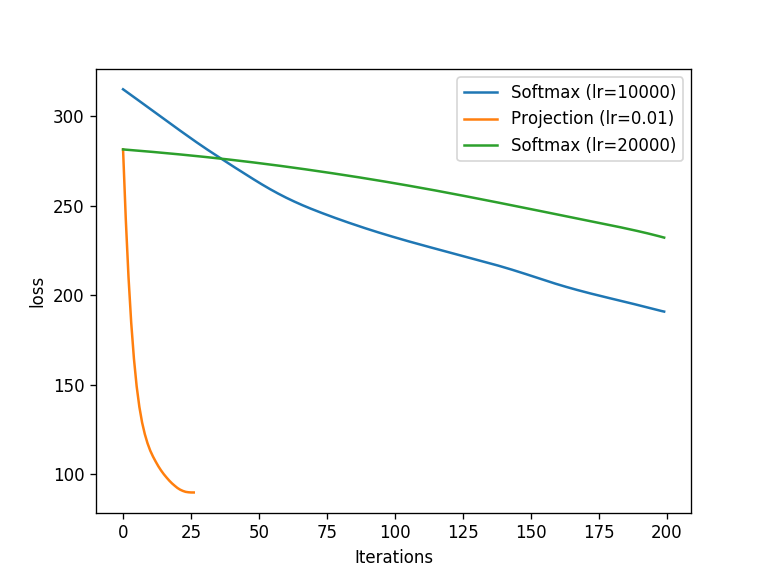

In [23]:
plt.figure()
plt.plot(n.losses, label='Softmax (lr=10000)')
plt.plot(n2.losses, label='Projection (lr=0.01)')
plt.plot(n3.losses, label='Softmax (lr=20000)')
plt.ylabel('loss')
plt.xlabel('Iterations')
plt.legend()